In [29]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pandas as pd
from scipy import ndimage
from PIL import Image
import ipywidgets as widgets
from ipywidgets import interact, interactive
from pigeon import annotate
from IPython.display import display, Image

In [3]:
data = h5py.File('/Users/cgroschner/Downloads/Chiral_D_2018_10_31_FilteredStack.emd','r')
subdata = data['data']
subdata = subdata['Masked Particles']
subdata = subdata['data'][:,:,:]

In [15]:
labels = pd.read_csv('/Users/cgroschner/Downloads/Chiral_D_ManualValues_2018_10_31.csv',names=['label'])

In [18]:
def label_num2str(lbl):
    if lbl == 6:
        title = 'right'
    elif lbl == 4:
        title = 'left'
    elif lbl == 5:
        title = 'unknown'
    else:
        title = 'garbage'
    return title

In [24]:
label_num2str(labels['label'].iloc[3])

'right'

In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


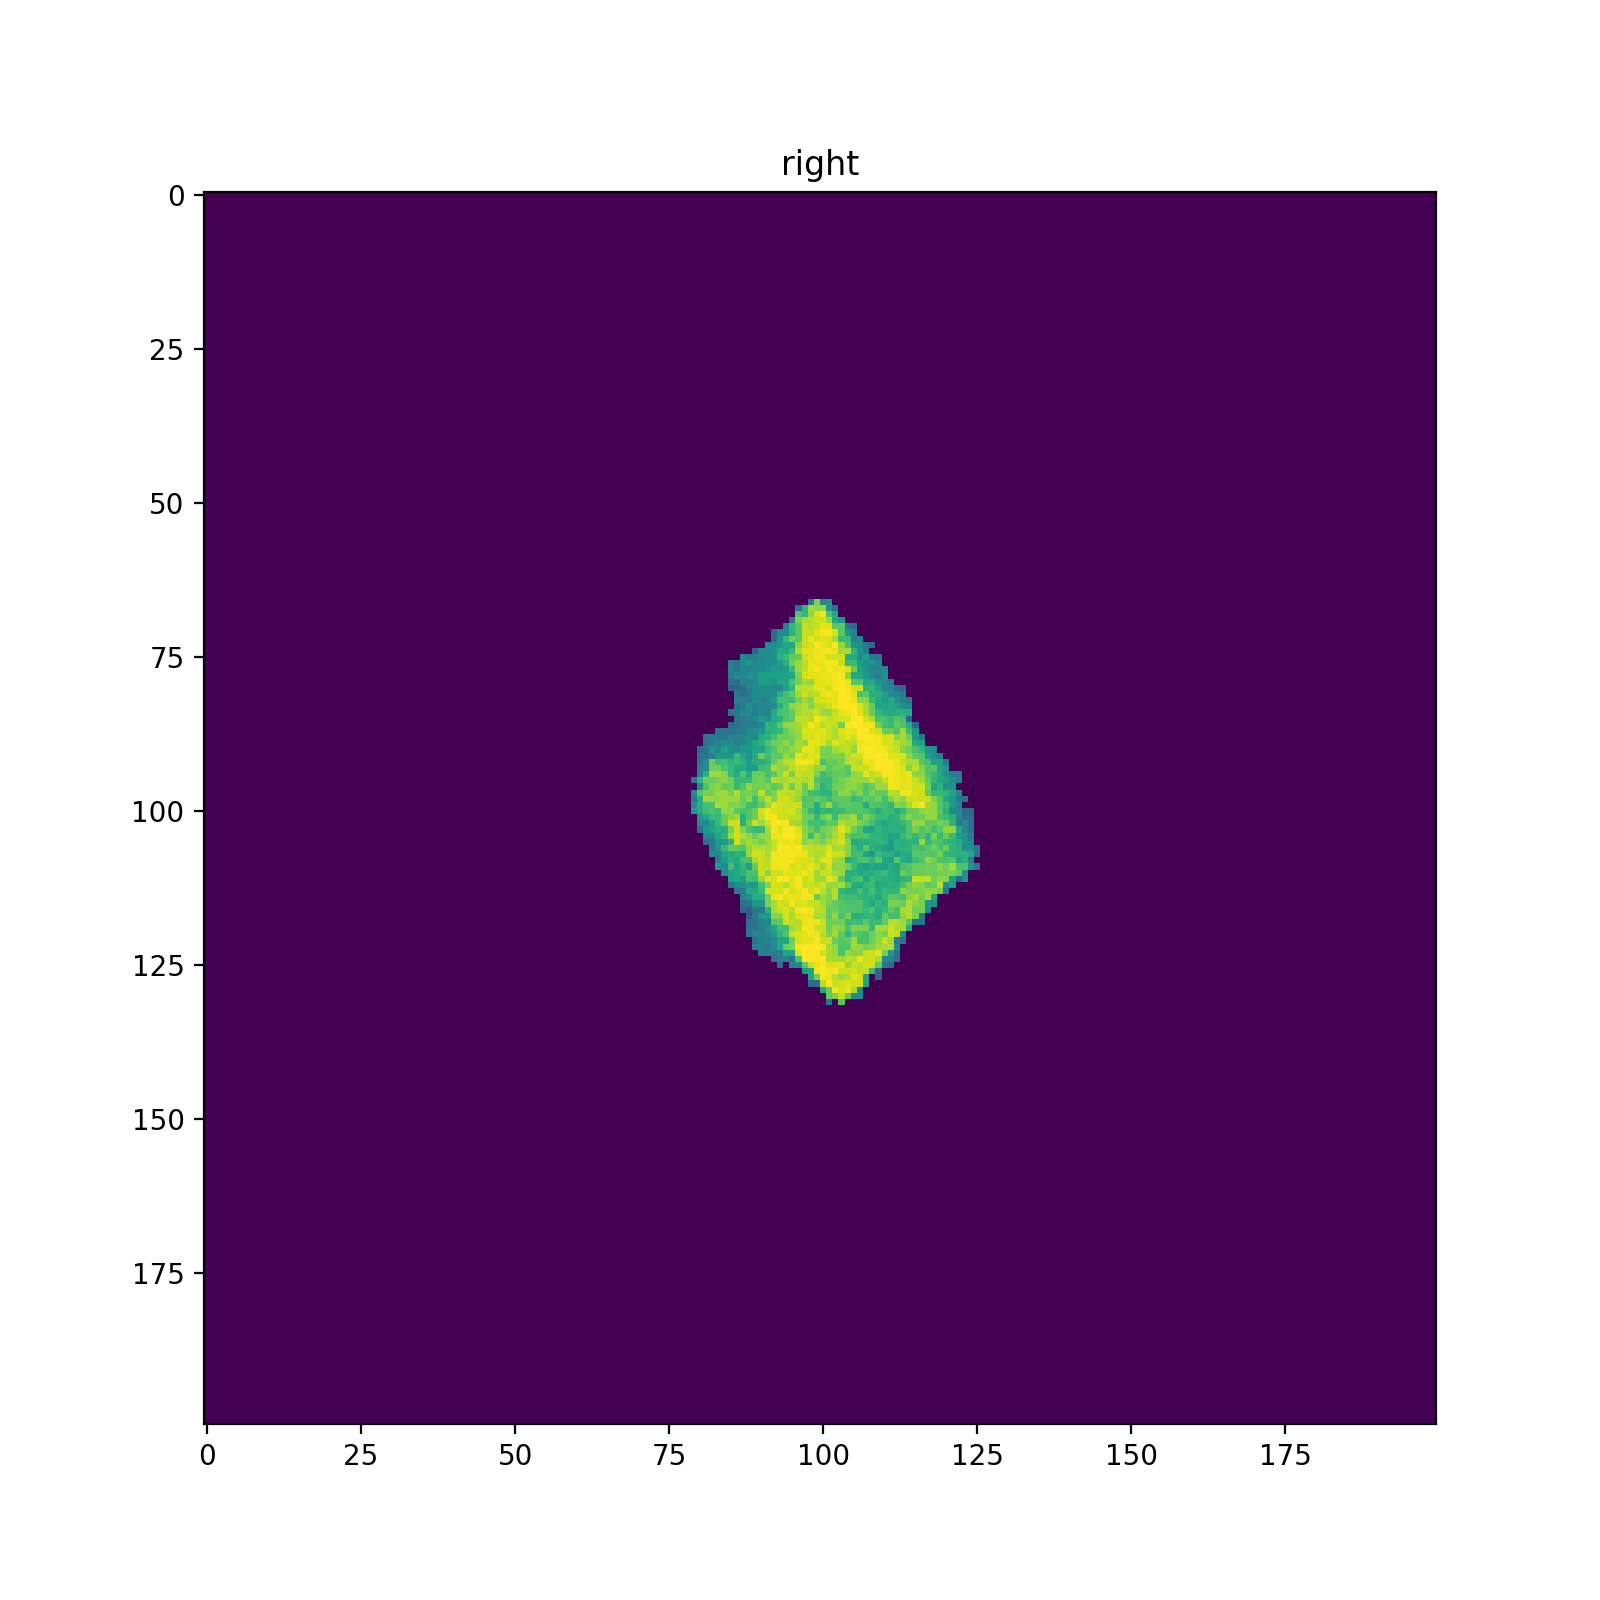

interactive(children=(IntSlider(value=499, description='i', max=999), Output()), _dom_classes=('widget-interac…

In [83]:
fg1, ax1 = plt.subplots(1,1,figsize=(8,8))
imax1 = ax1.imshow(subdata[0,:,:])
title = label_num2str(labels['label'].iloc[0])
ax1.set_title(title) 
#Updates the plot
def axUpdate(i):
    imax1.set_array(subdata[i,:,:])
    title = label_num2str(labels['label'].iloc[i])
    ax1.set_title(title) 
w = interactive(axUpdate, i=(0,labels.shape[0]-1))
display(w)

In [30]:
data = h5py.File('/Users/cgroschner/Downloads/Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs.h5','r')

In [32]:
list(data.keys())

['cutouts', 'cutparams', 'flood', 'imc', 'imcparams', 'params']

In [33]:
data['cutouts']

<HDF5 dataset "cutouts": shape (825, 128, 128), type "<i4">

<IPython.core.display.Javascript object>


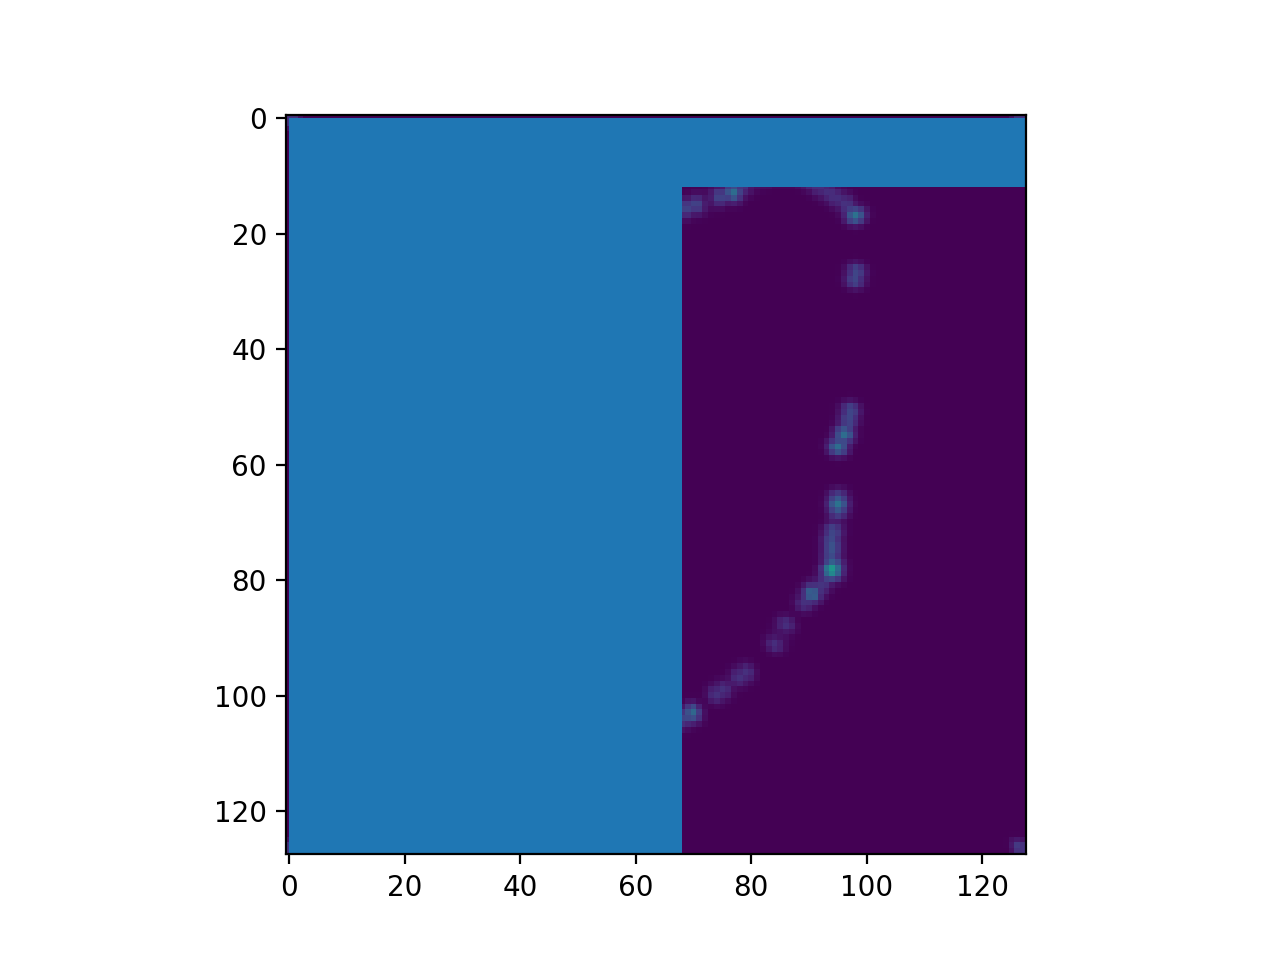

In [42]:
_ = plt.hist(particles_indiv[0].flatten(),bins =15)

In [44]:
particles_indiv = data['cutouts'][:,:,:]

In [119]:
masks_indv = particles_indiv.copy()

In [120]:
masks_indv[masks_indv<=50] = 0
masks_indv[masks_indv>50] = 1

In [47]:
import sys

In [48]:
sys.path.append('/Users/cgroschner/Documents/HTTEM/segmentation/')

In [49]:
import realDataProcess as rdp

/Users/cgroschner/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/cgroschner/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/cgroschner/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<IPython.core.display.Javascript object>


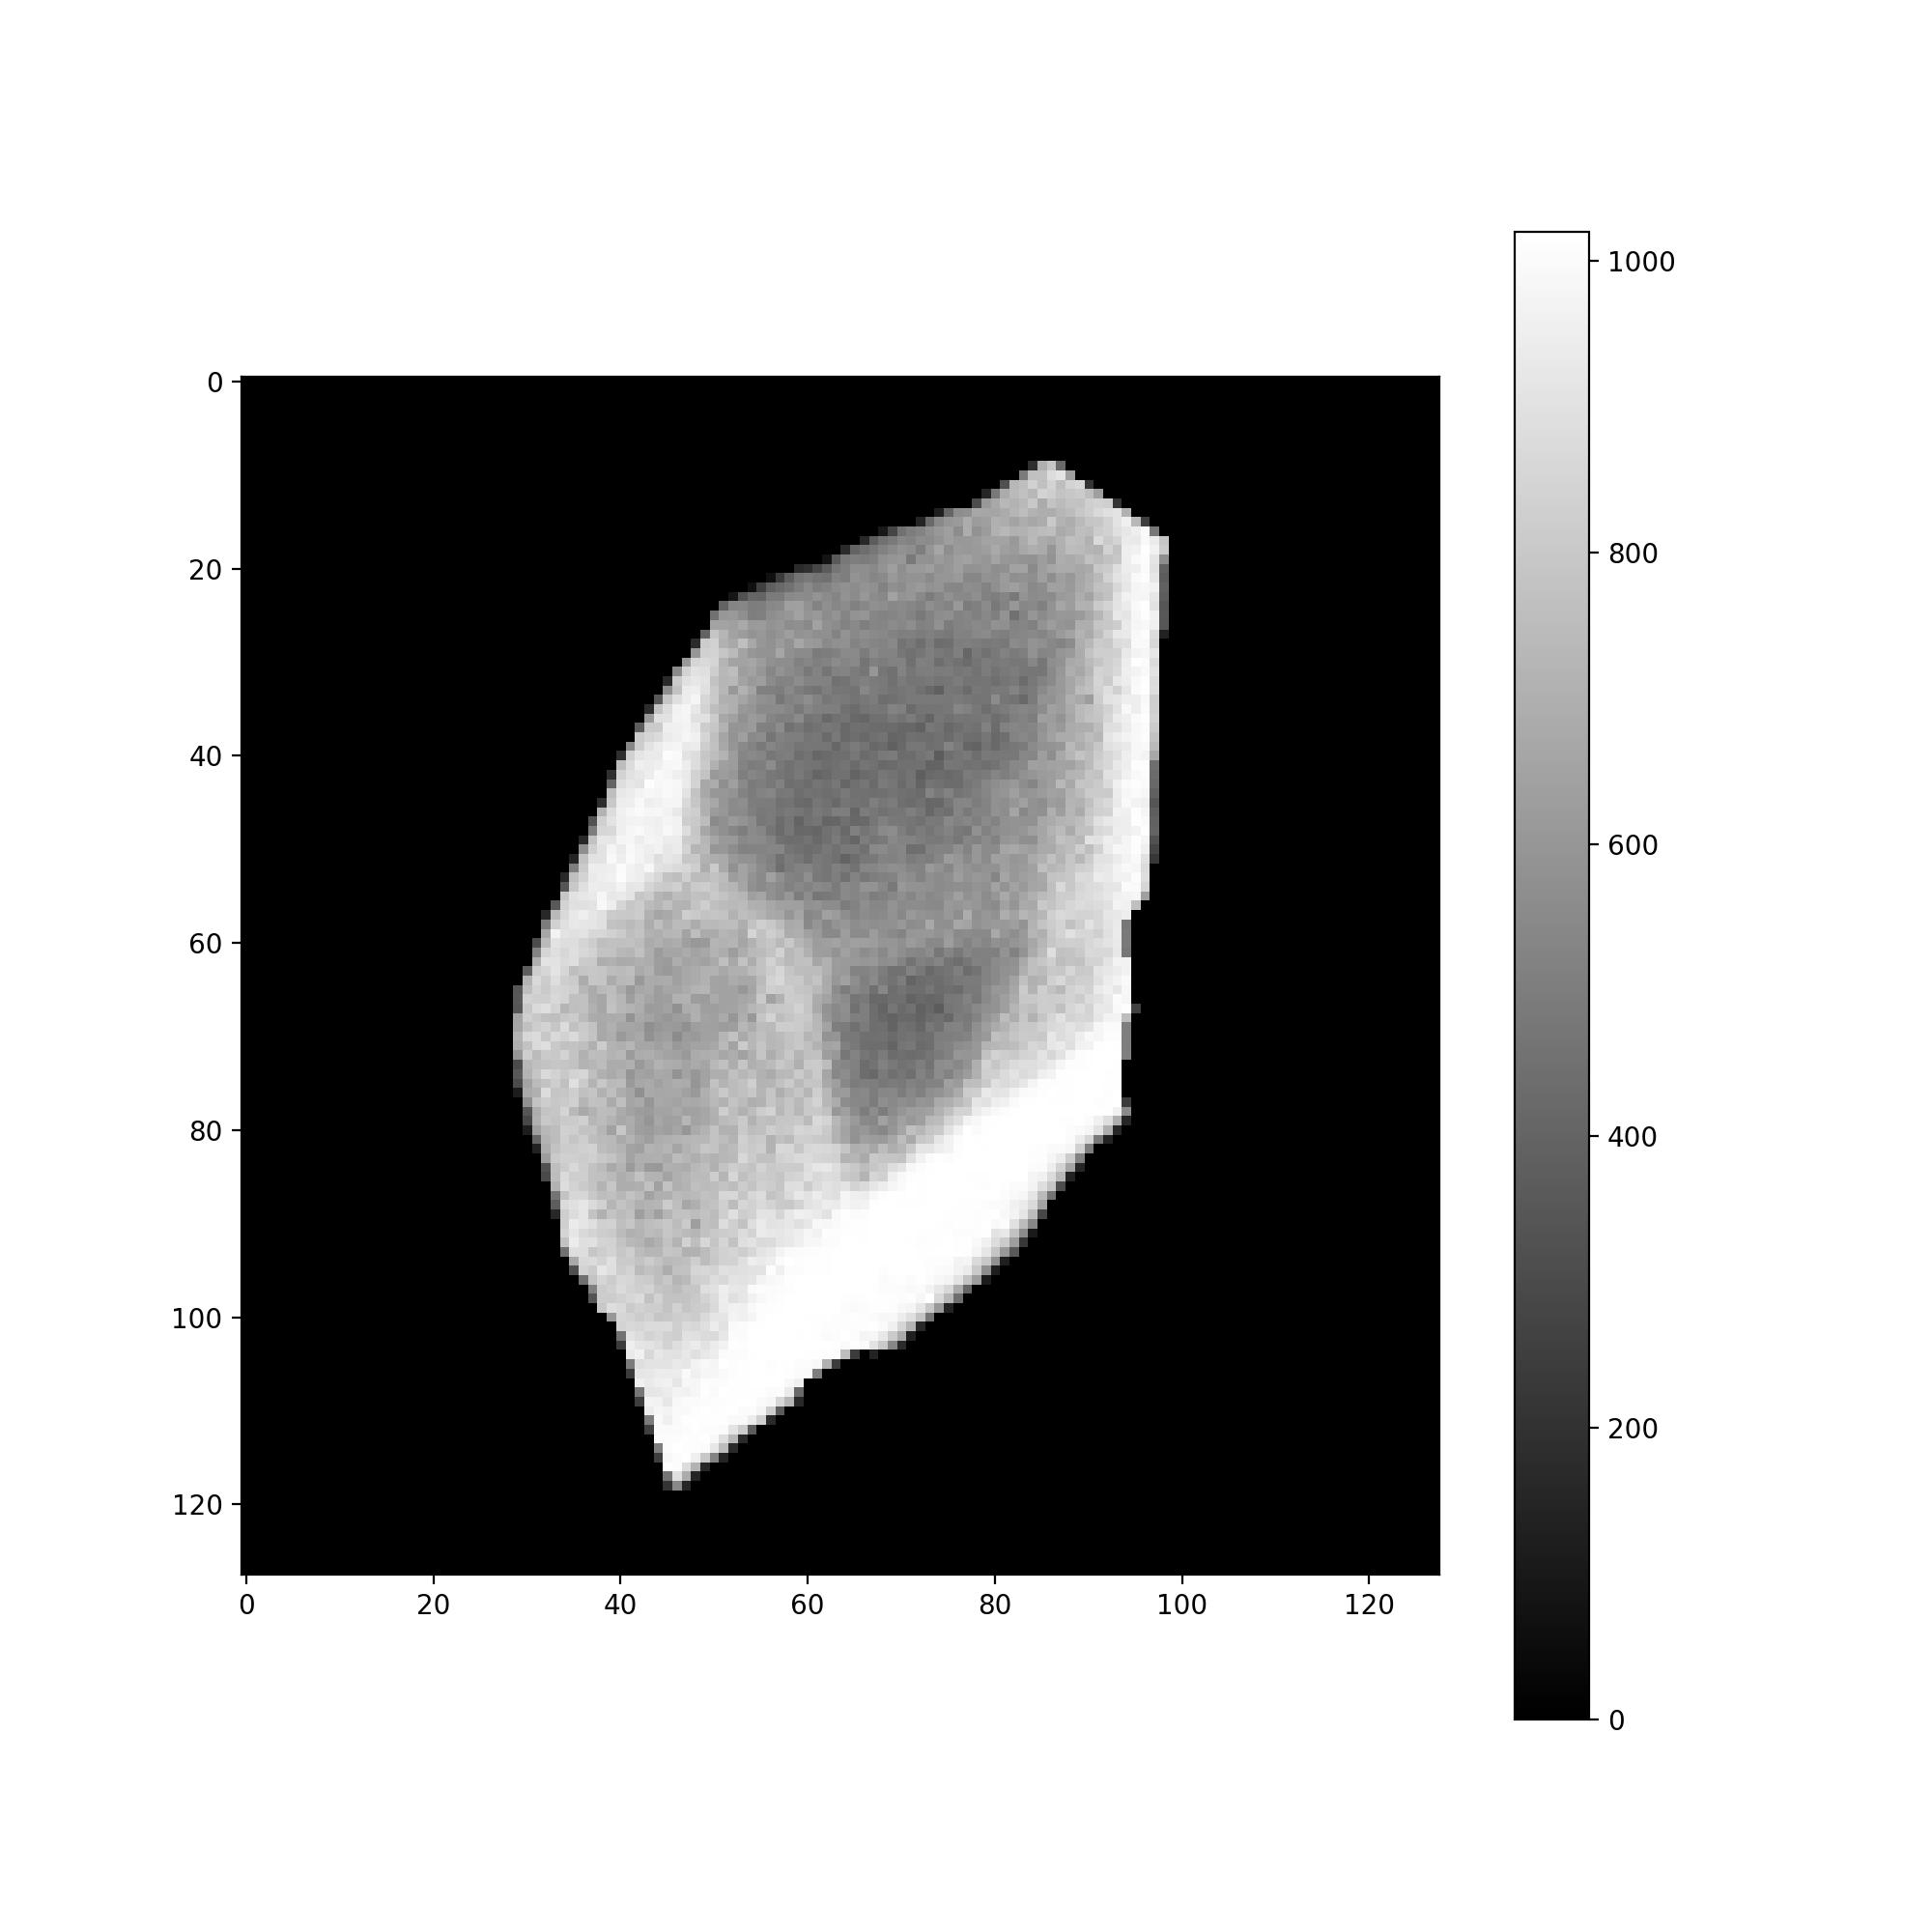

In [95]:
rdp.imm(particles_indiv[0],(128,128))

<IPython.core.display.Javascript object>


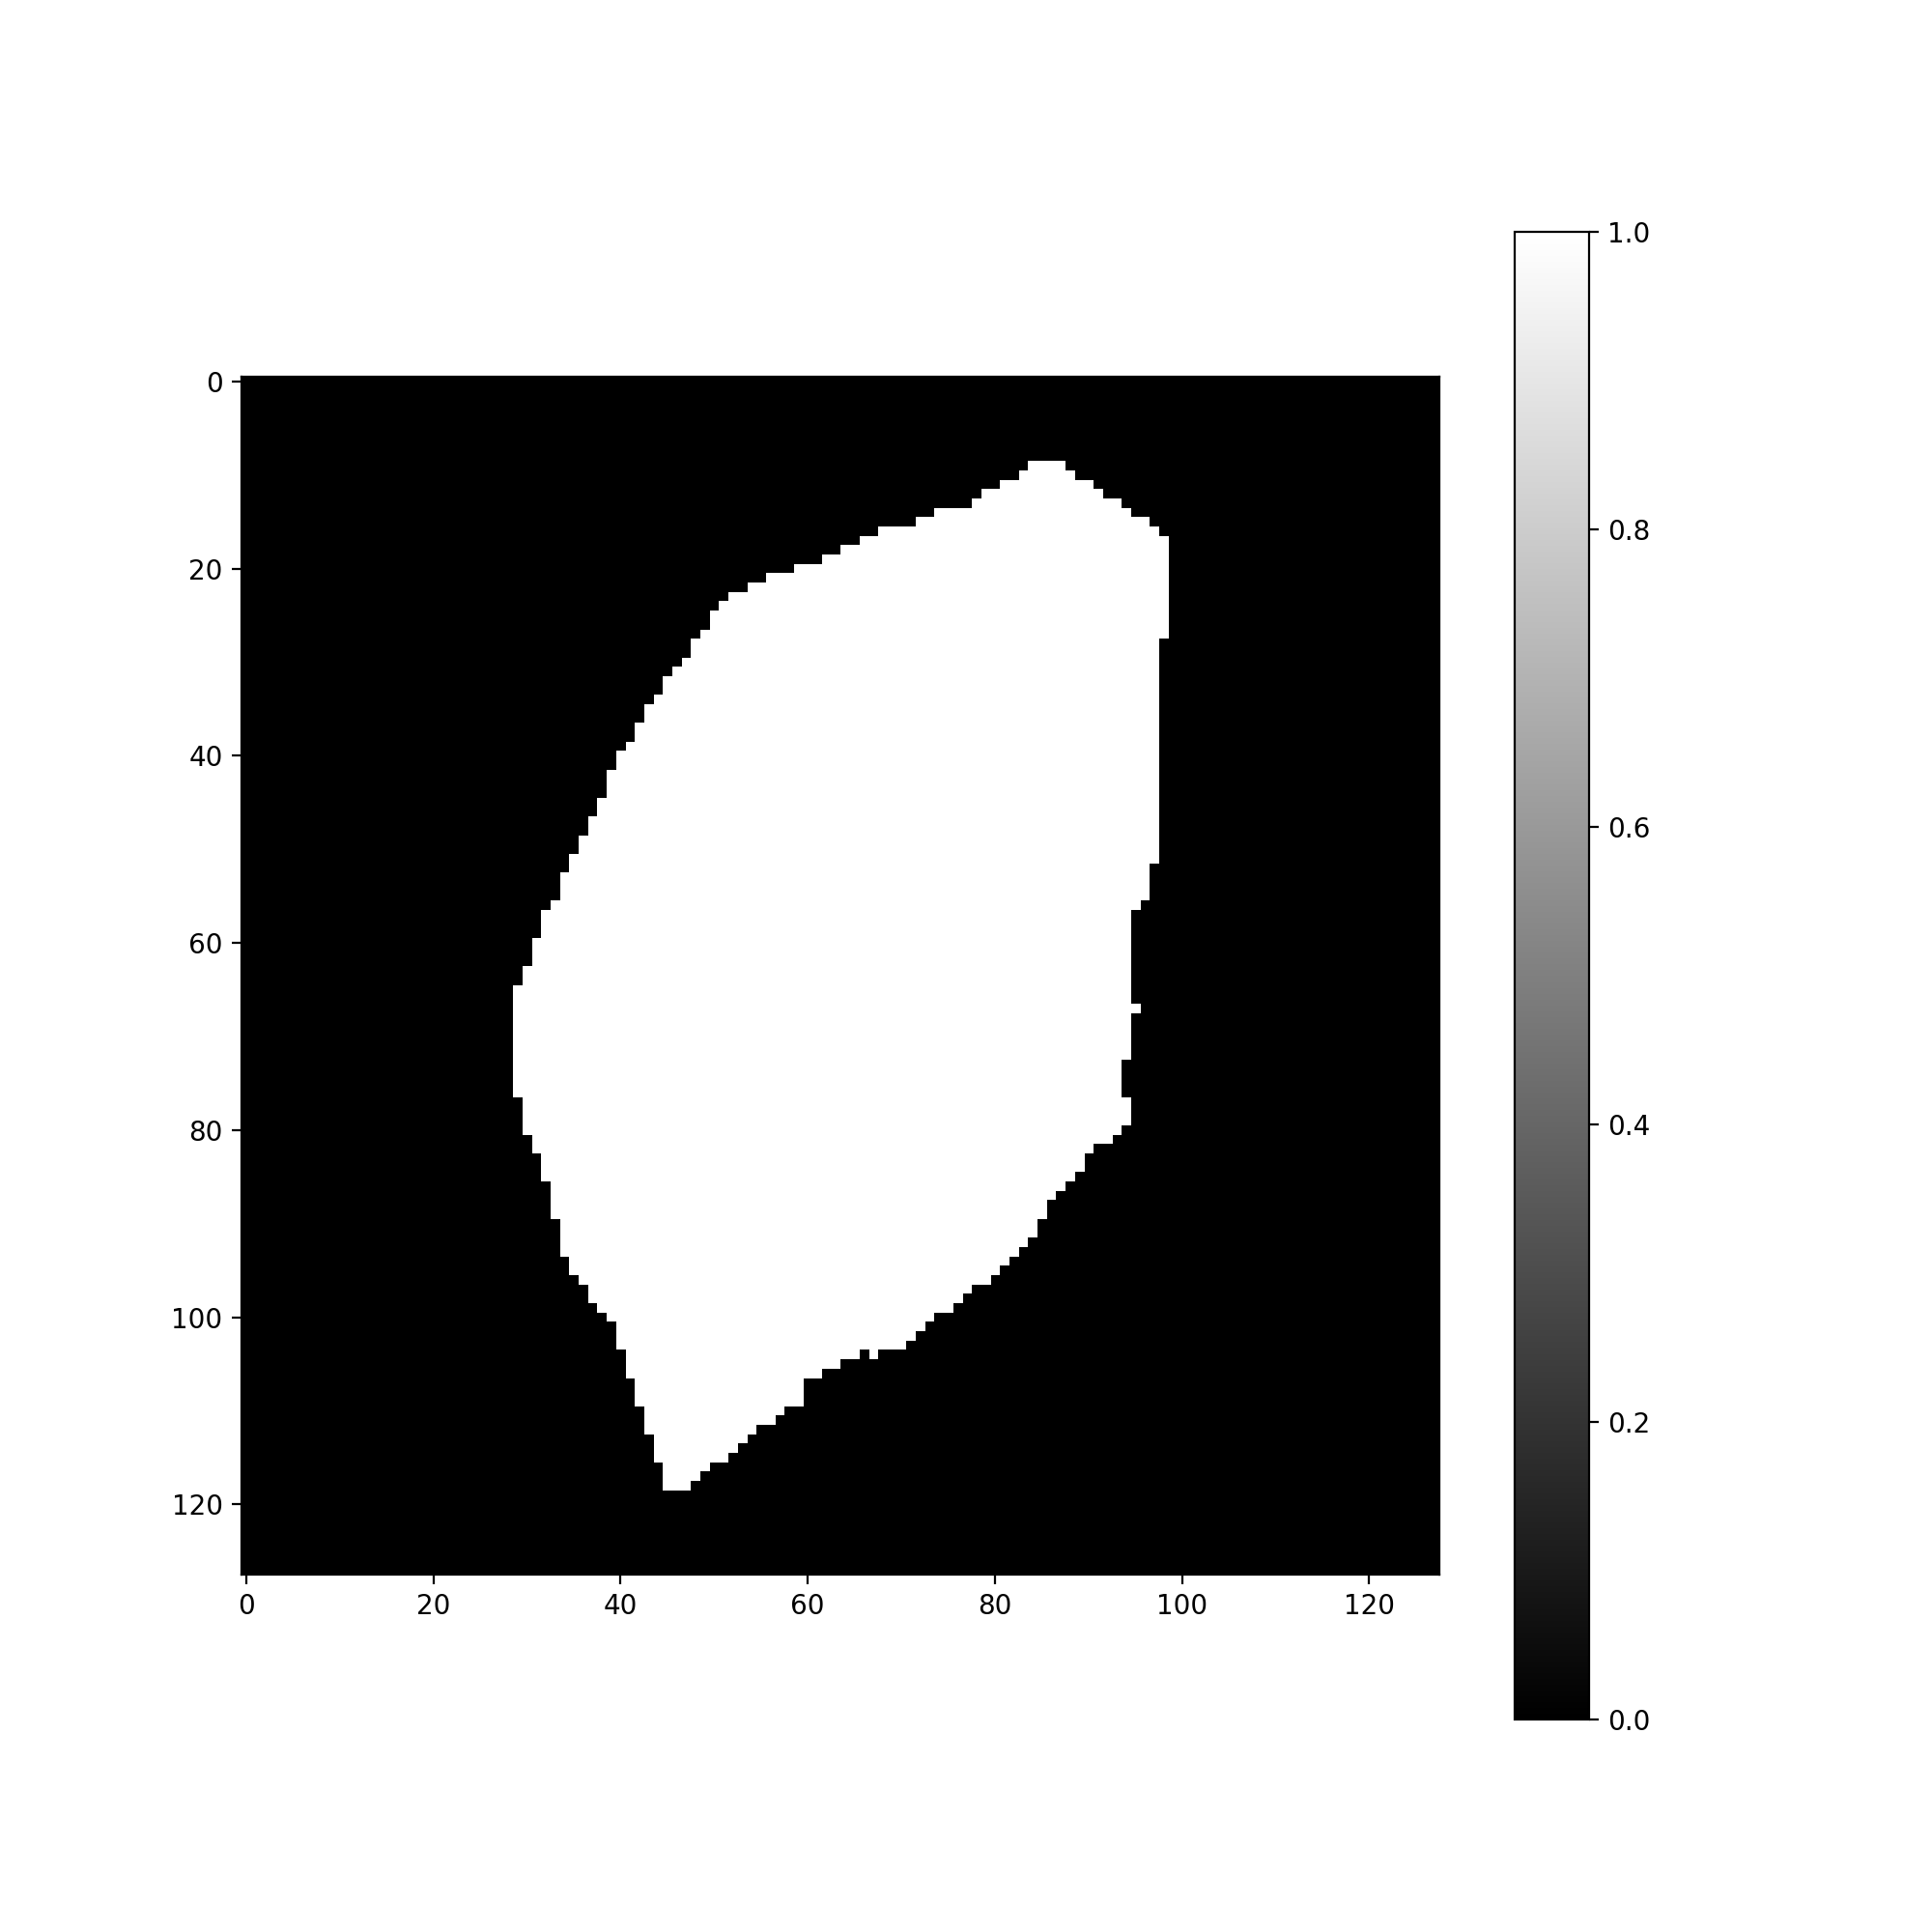

In [53]:
rdp.imm(masks_indv[0],size=masks_indv[0].shape)

<IPython.core.display.Javascript object>


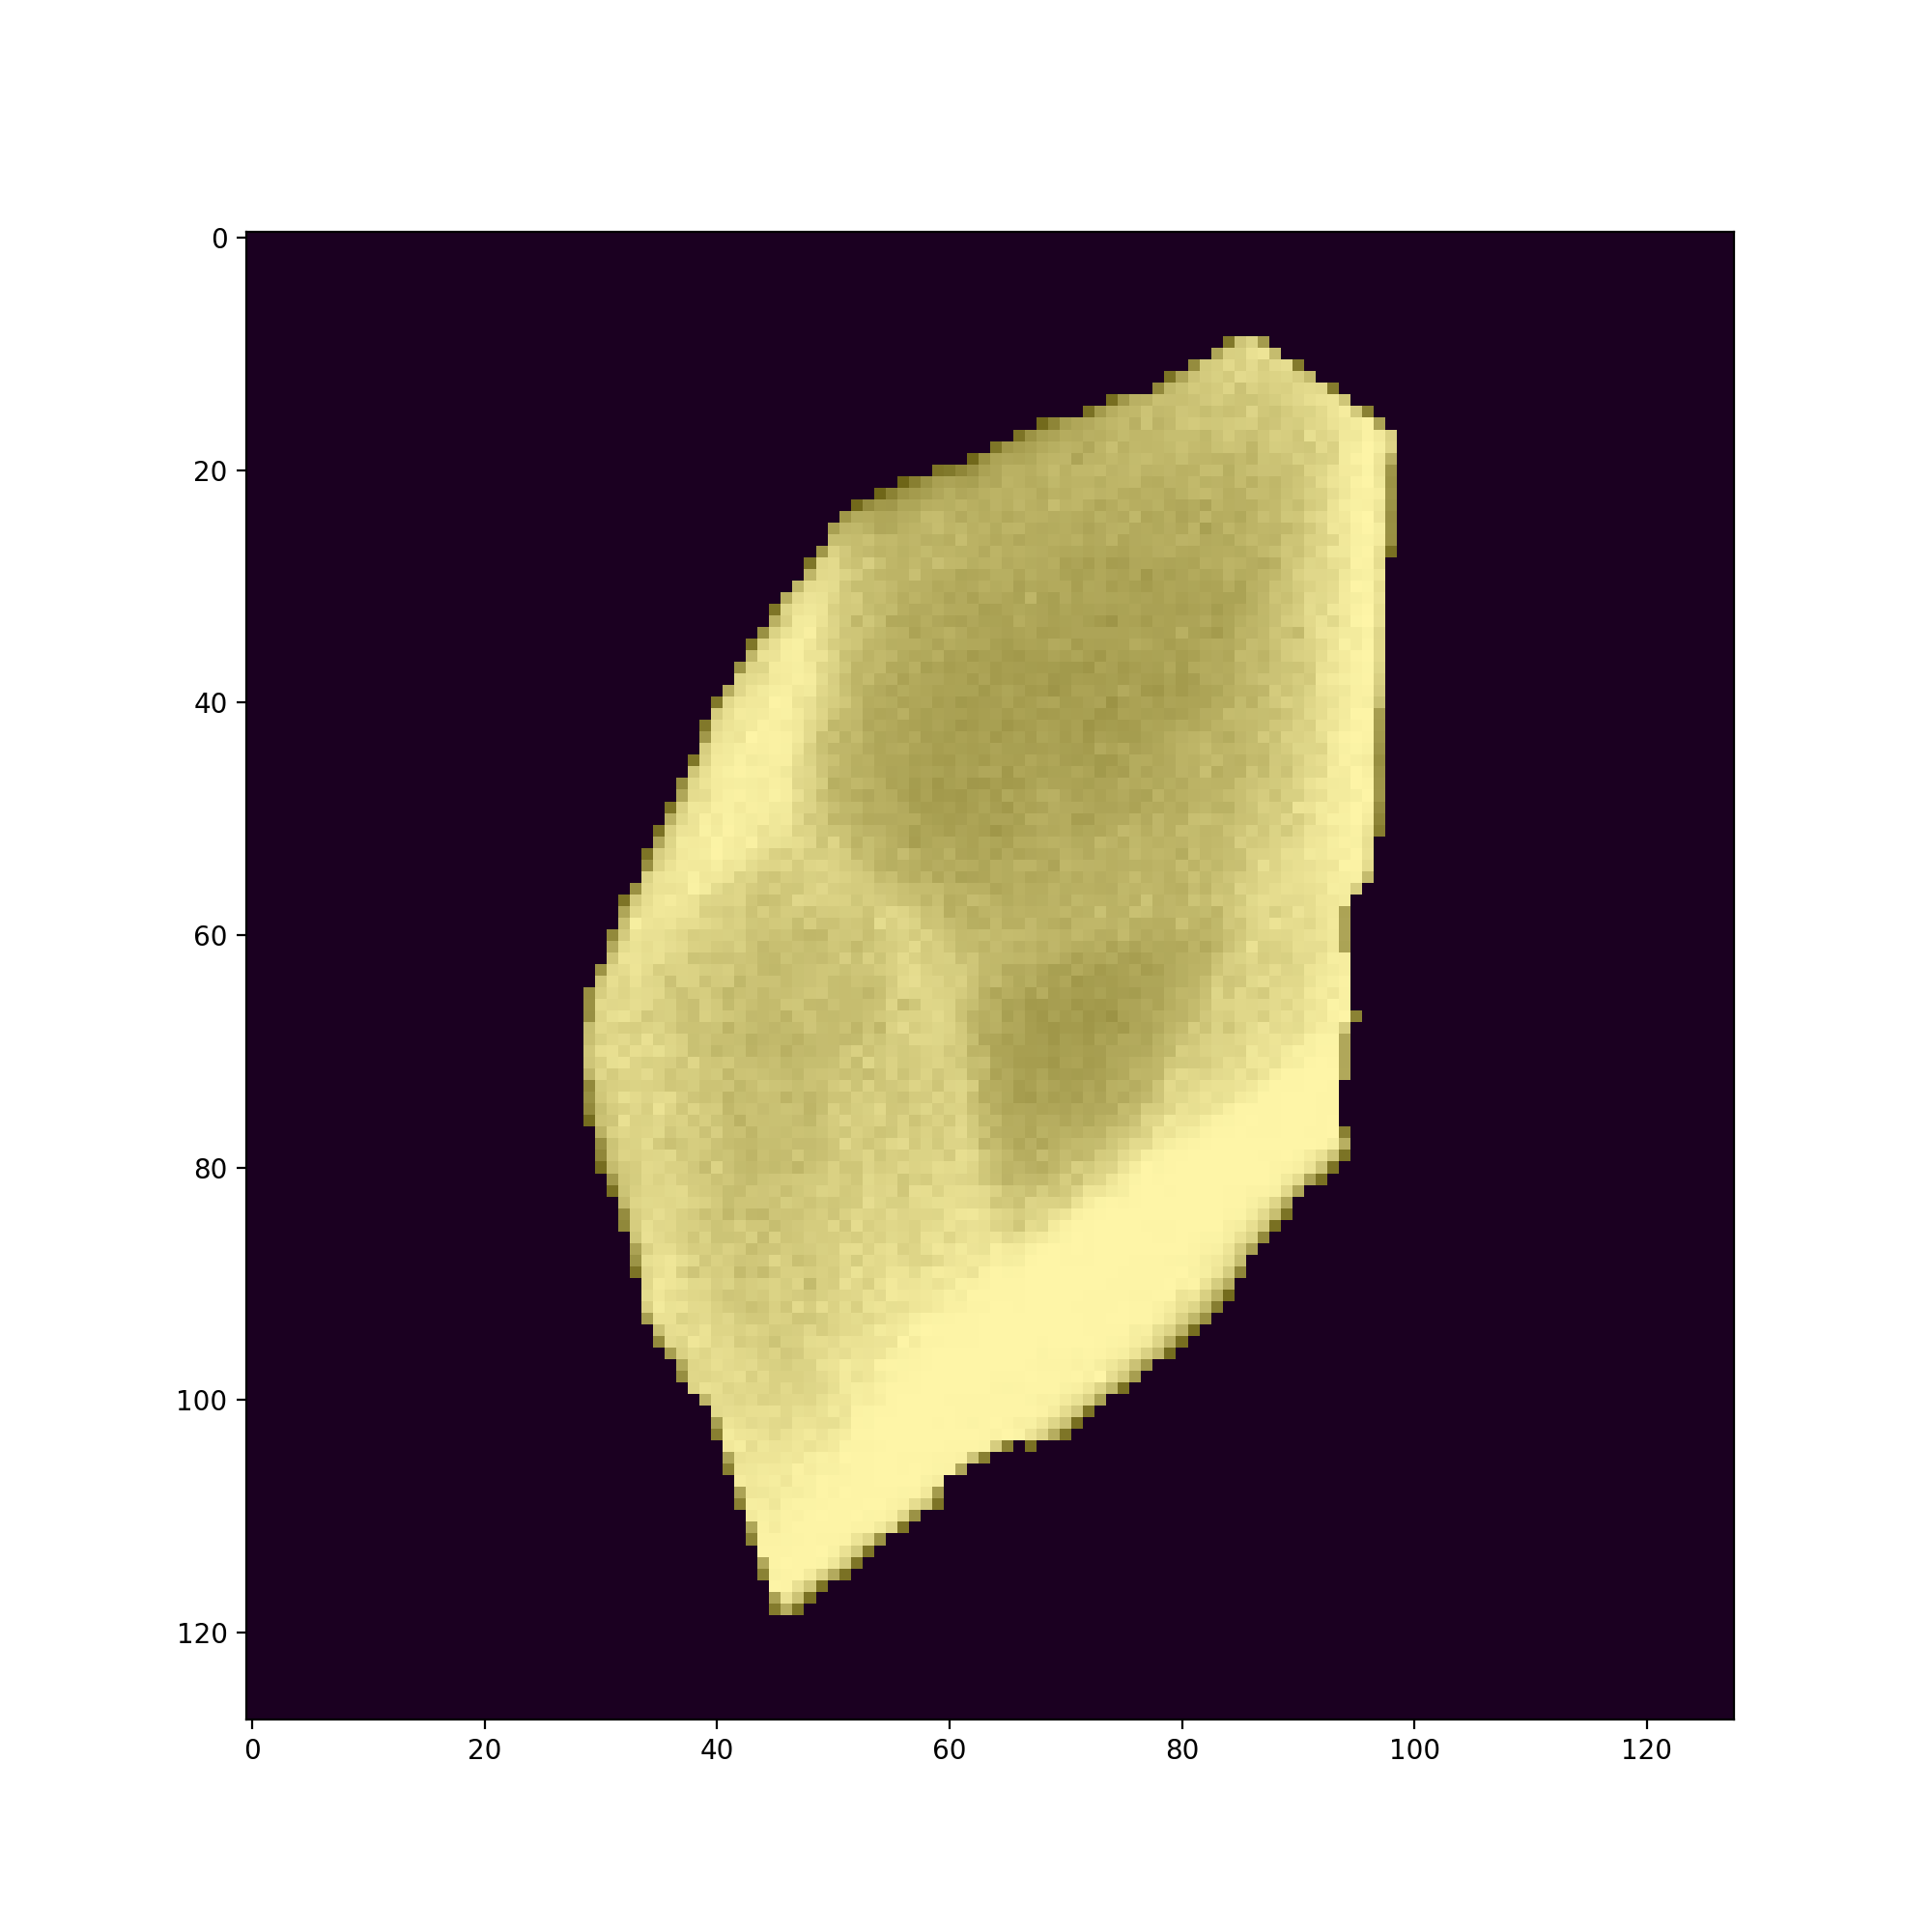

In [50]:
rdp.immOverlay(particles_indiv,masks_indv,0)

In [55]:
from scipy import ndimage
import math
from skimage.feature import peak_local_max, corner_peaks, corner_foerstner

/Users/cgroschner/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [80]:
sig = 1
accuracythresh = 3e-19
roundnessthresh = 0.4
mindist = 13
foerstner_w, foerstner_q = corner_foerstner(masks_indv[0], sigma = sig)
        
        # Apply math to Foerstner variables and parameters to get "corner response image"
foerstner_response_image = (foerstner_q > roundnessthresh) * (foerstner_w > accuracythresh) * foerstner_w
        
        # Find corners based on peaks in the corner response image
coords_foerstner = corner_peaks(foerstner_response_image, min_distance = mindist)

<IPython.core.display.Javascript object>


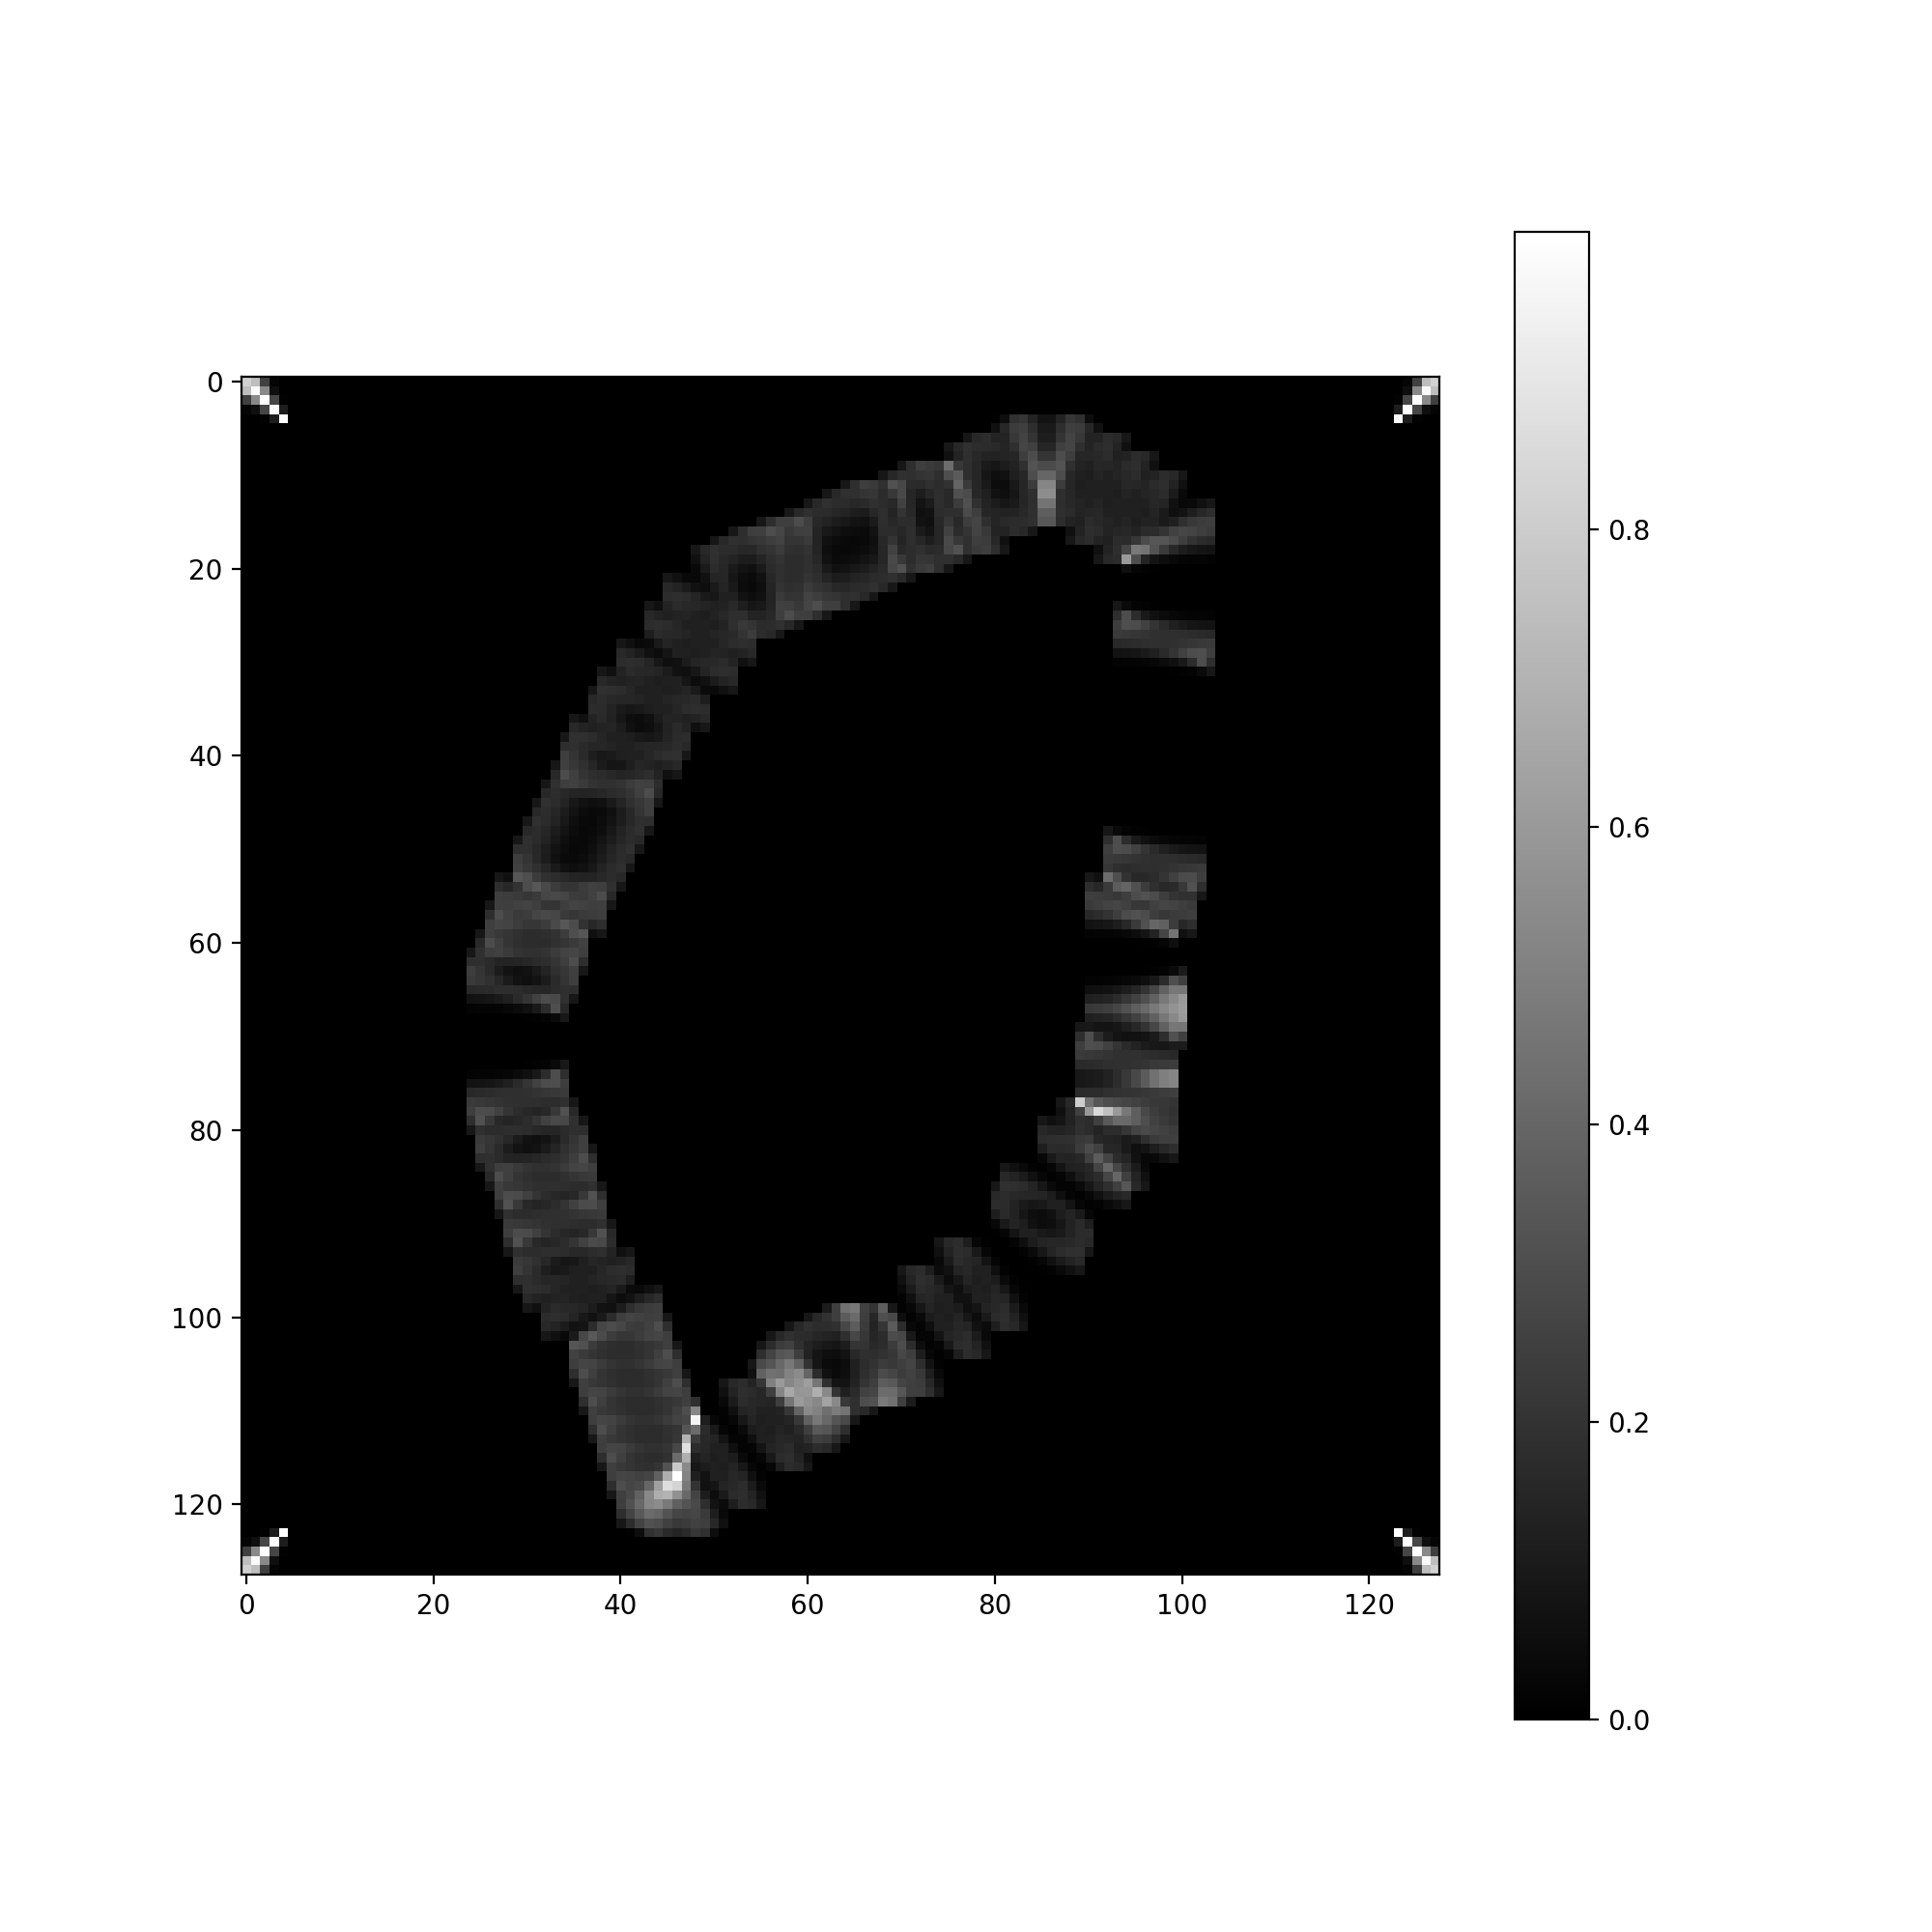

In [76]:
rdp.imm(foerstner_q,(128,128))

<IPython.core.display.Javascript object>


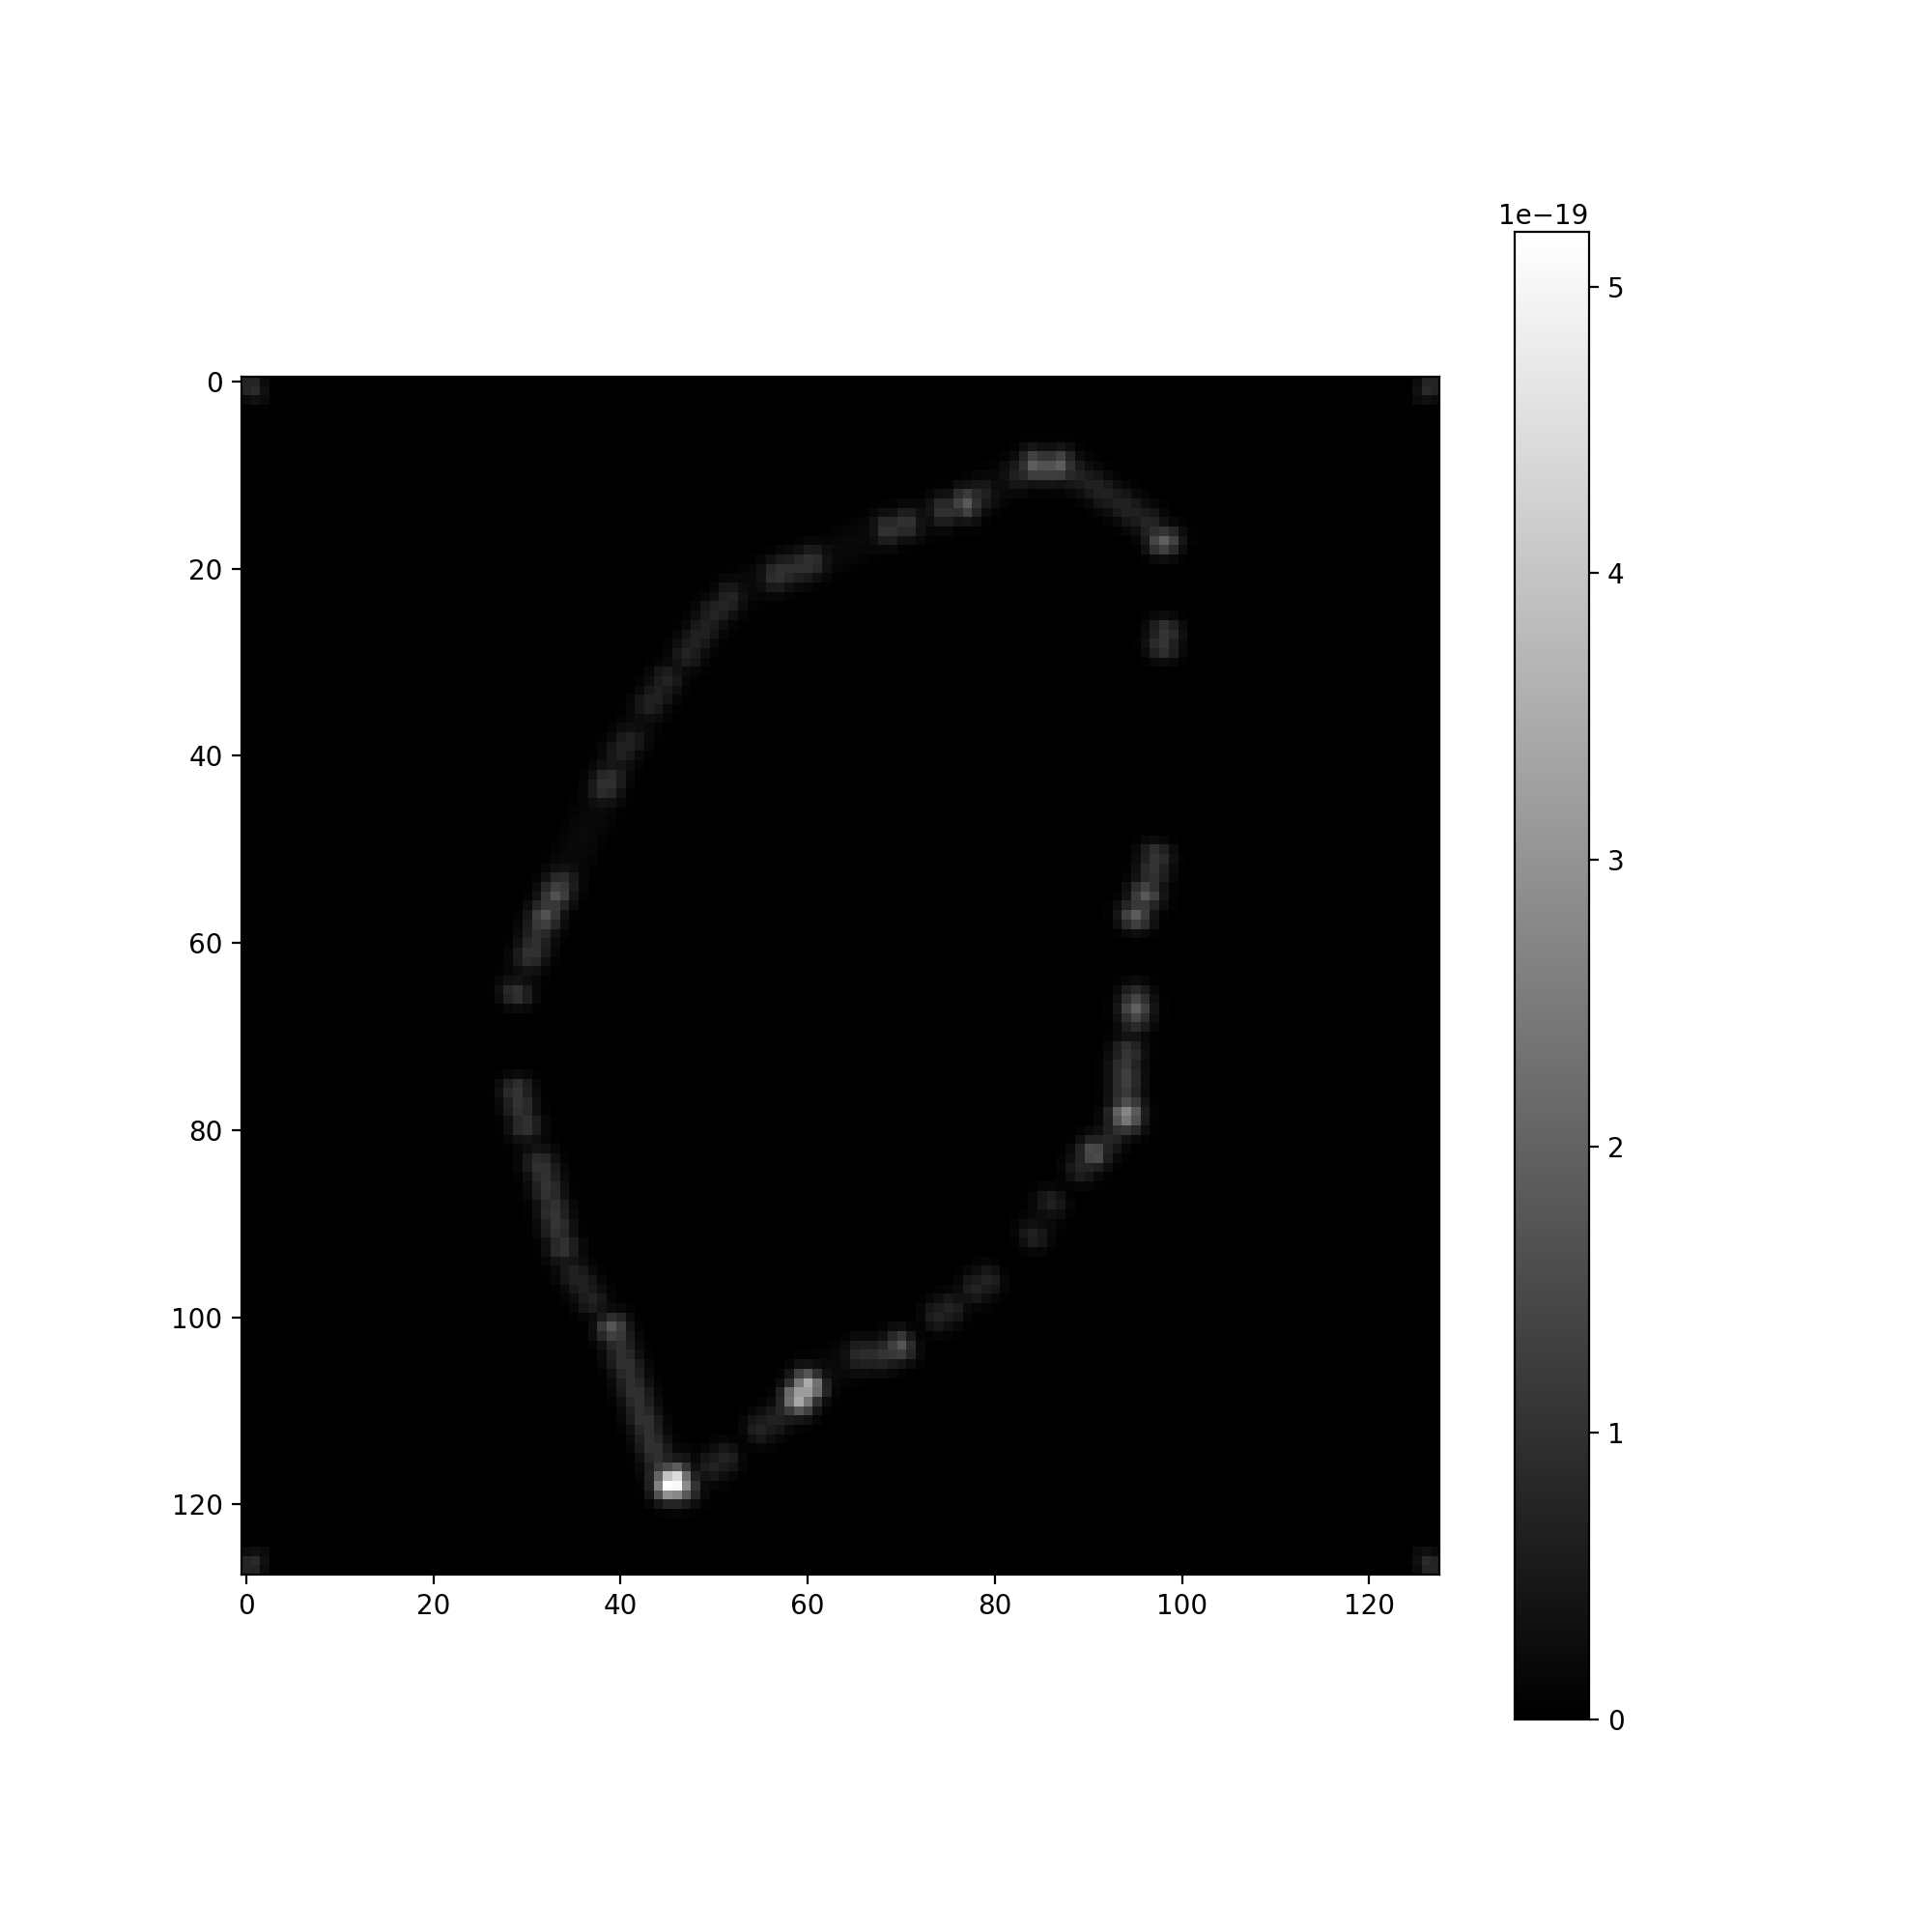

In [82]:
rdp.imm(foerstner_w,(128,128))

<IPython.core.display.Javascript object>


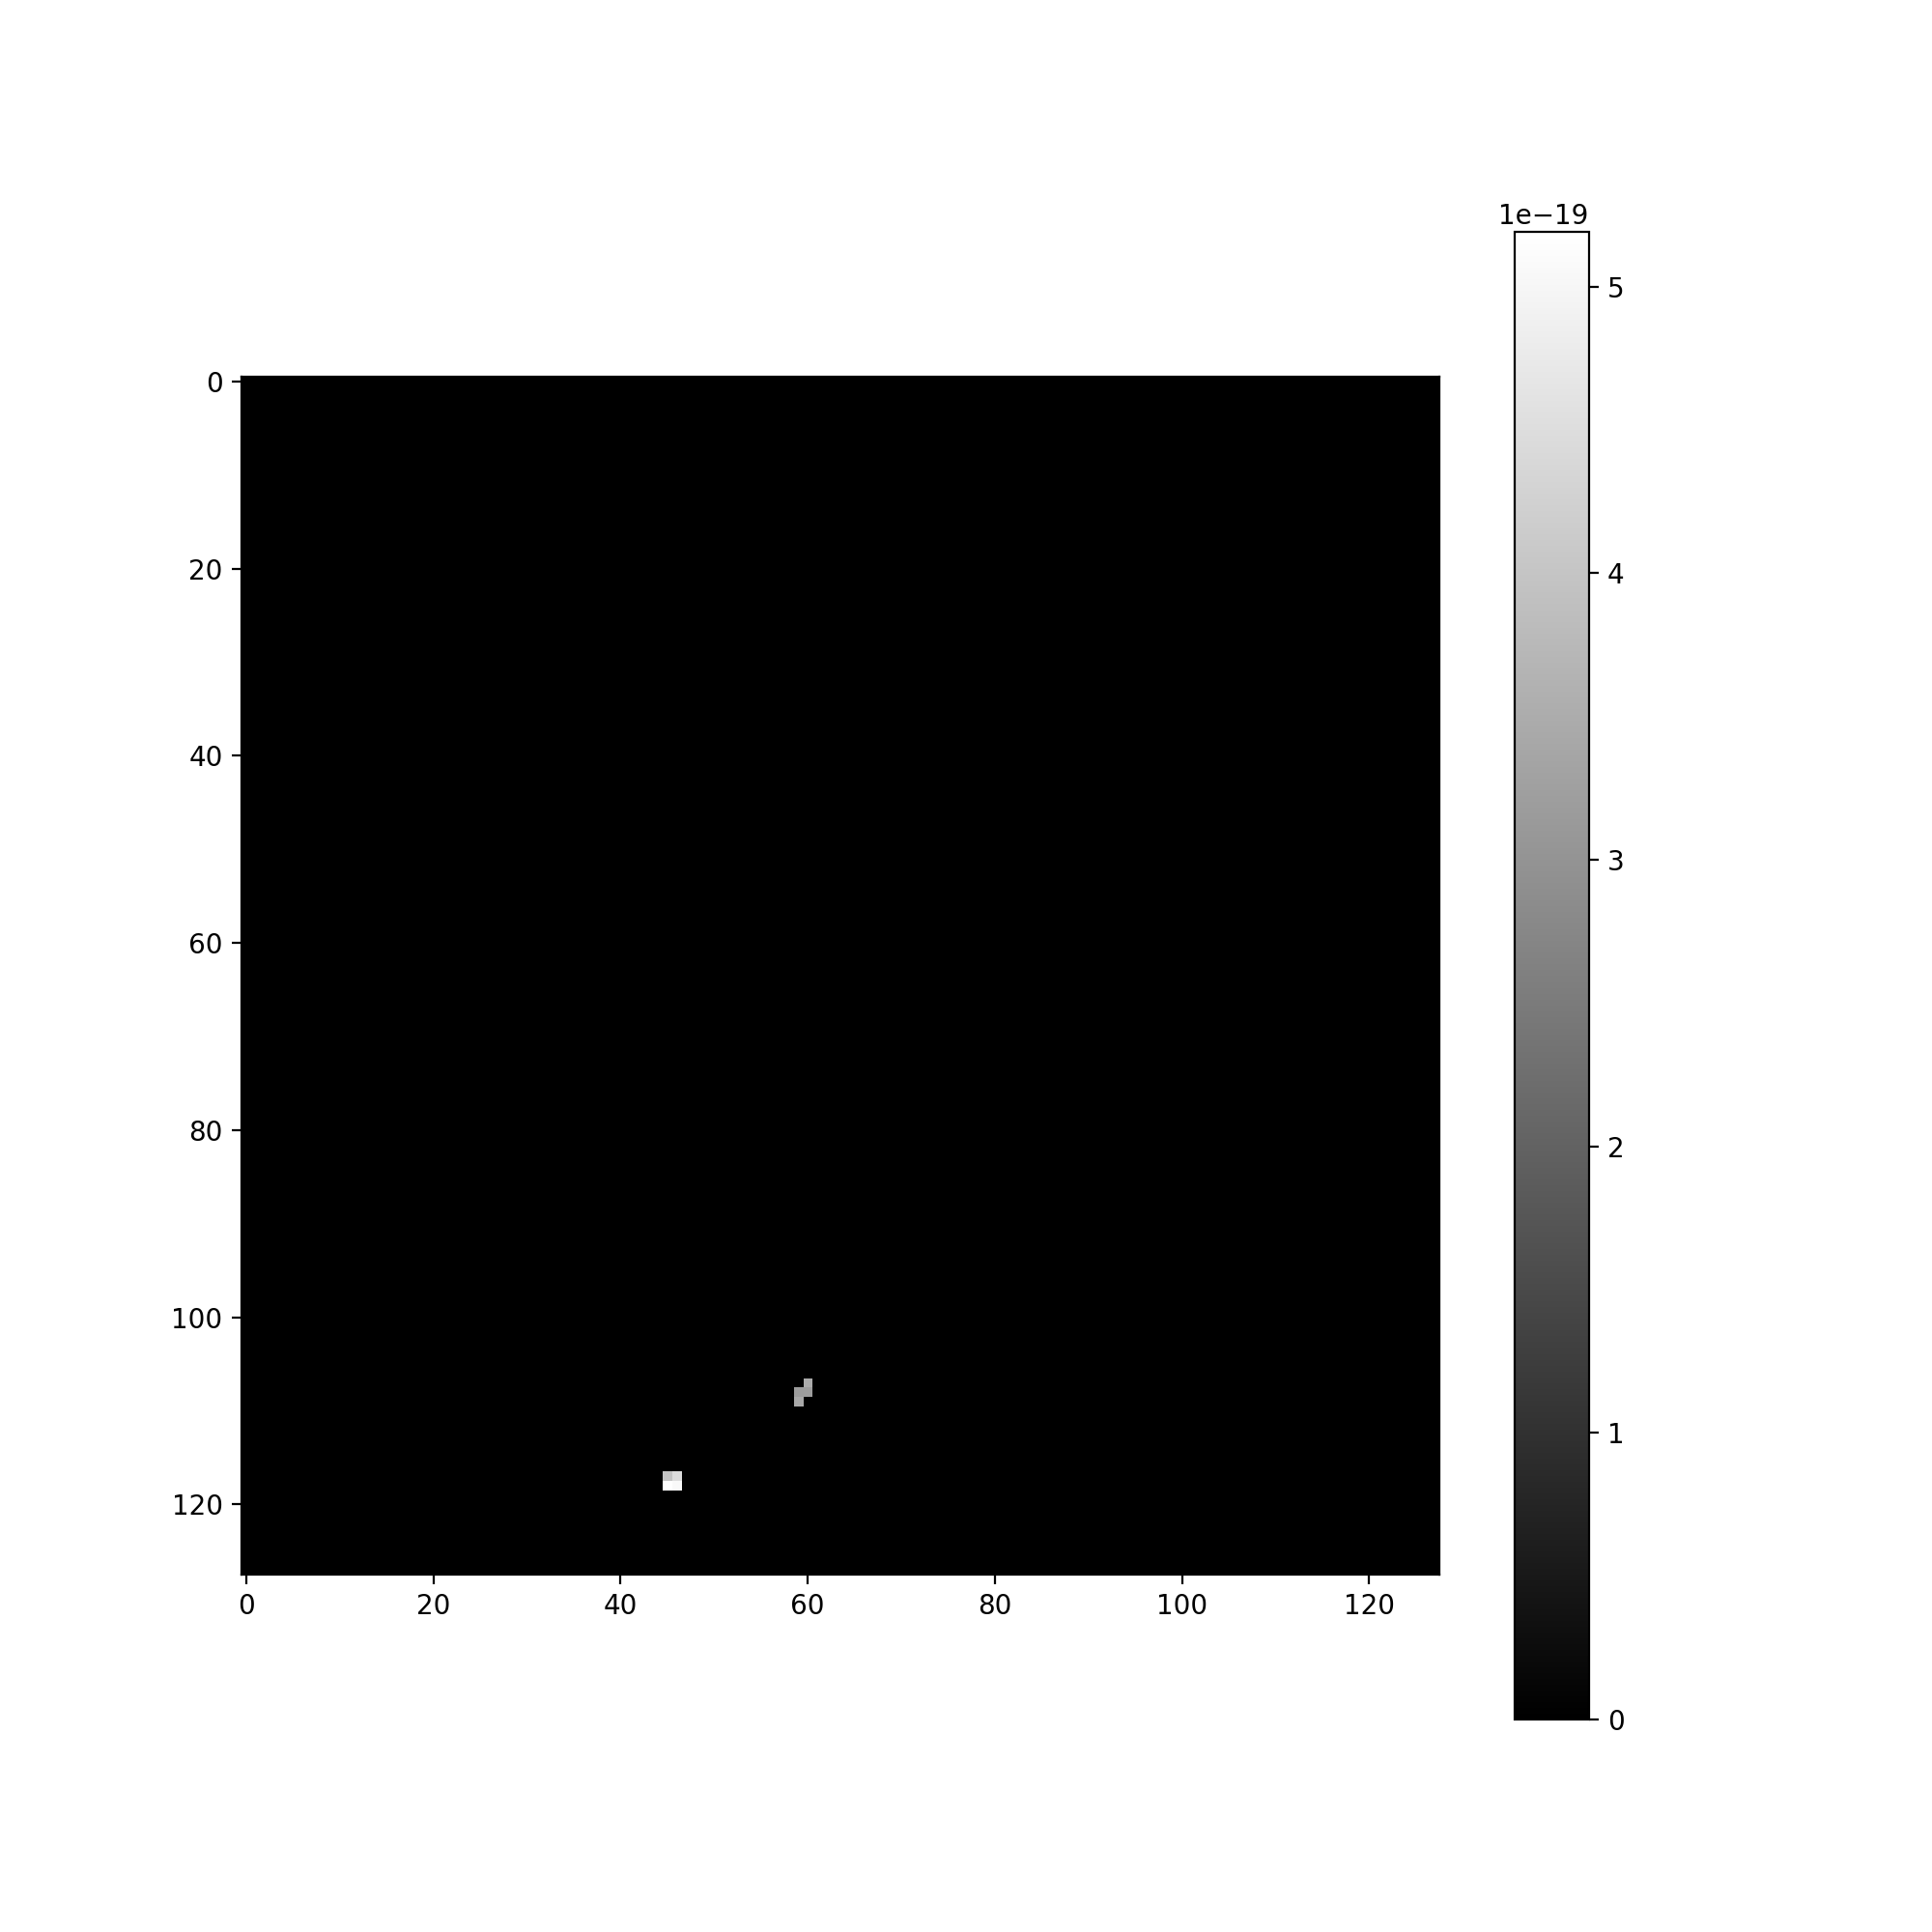

In [81]:
rdp.imm(foerstner_response_image,(128,128))

In [79]:
coords_foerstner

array([[ 78,  94],
       [107,  60]])

In [84]:
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

In [91]:
label_img = label(masks_indv[1].copy())
regions = regionprops(label_img)

<IPython.core.display.Javascript object>


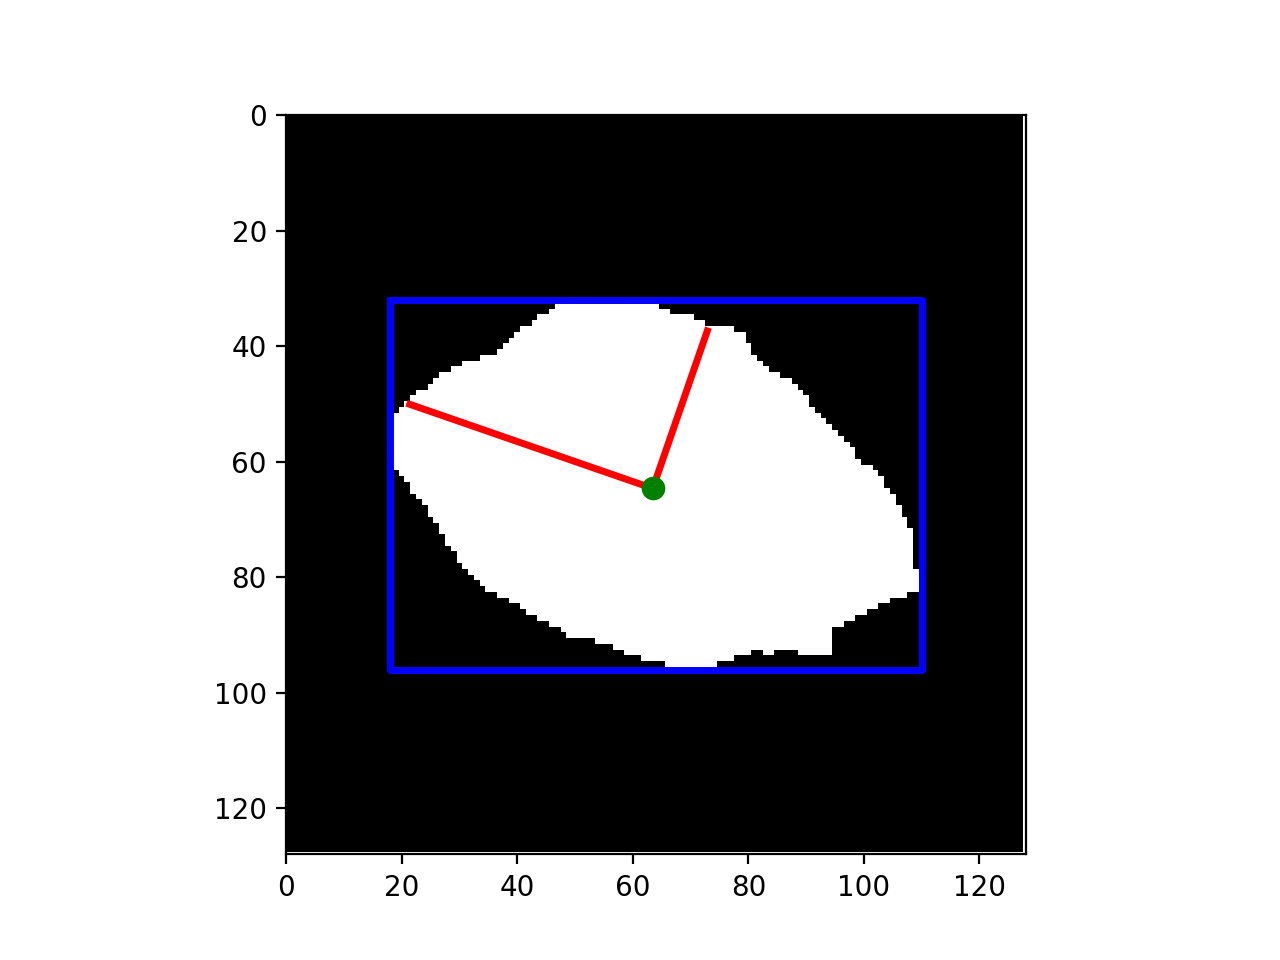

In [92]:
fig, ax = plt.subplots()
ax.imshow(masks_indv[1], cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 128, 128, 0))
plt.show()

In [93]:
orientation*(180/np.pi)

70.90349098698071

In [97]:
x2

21.366697535089976

In [138]:
rot_test = rotate(particles_indiv[1],-1*orientation*(180/np.pi))

<IPython.core.display.Javascript object>


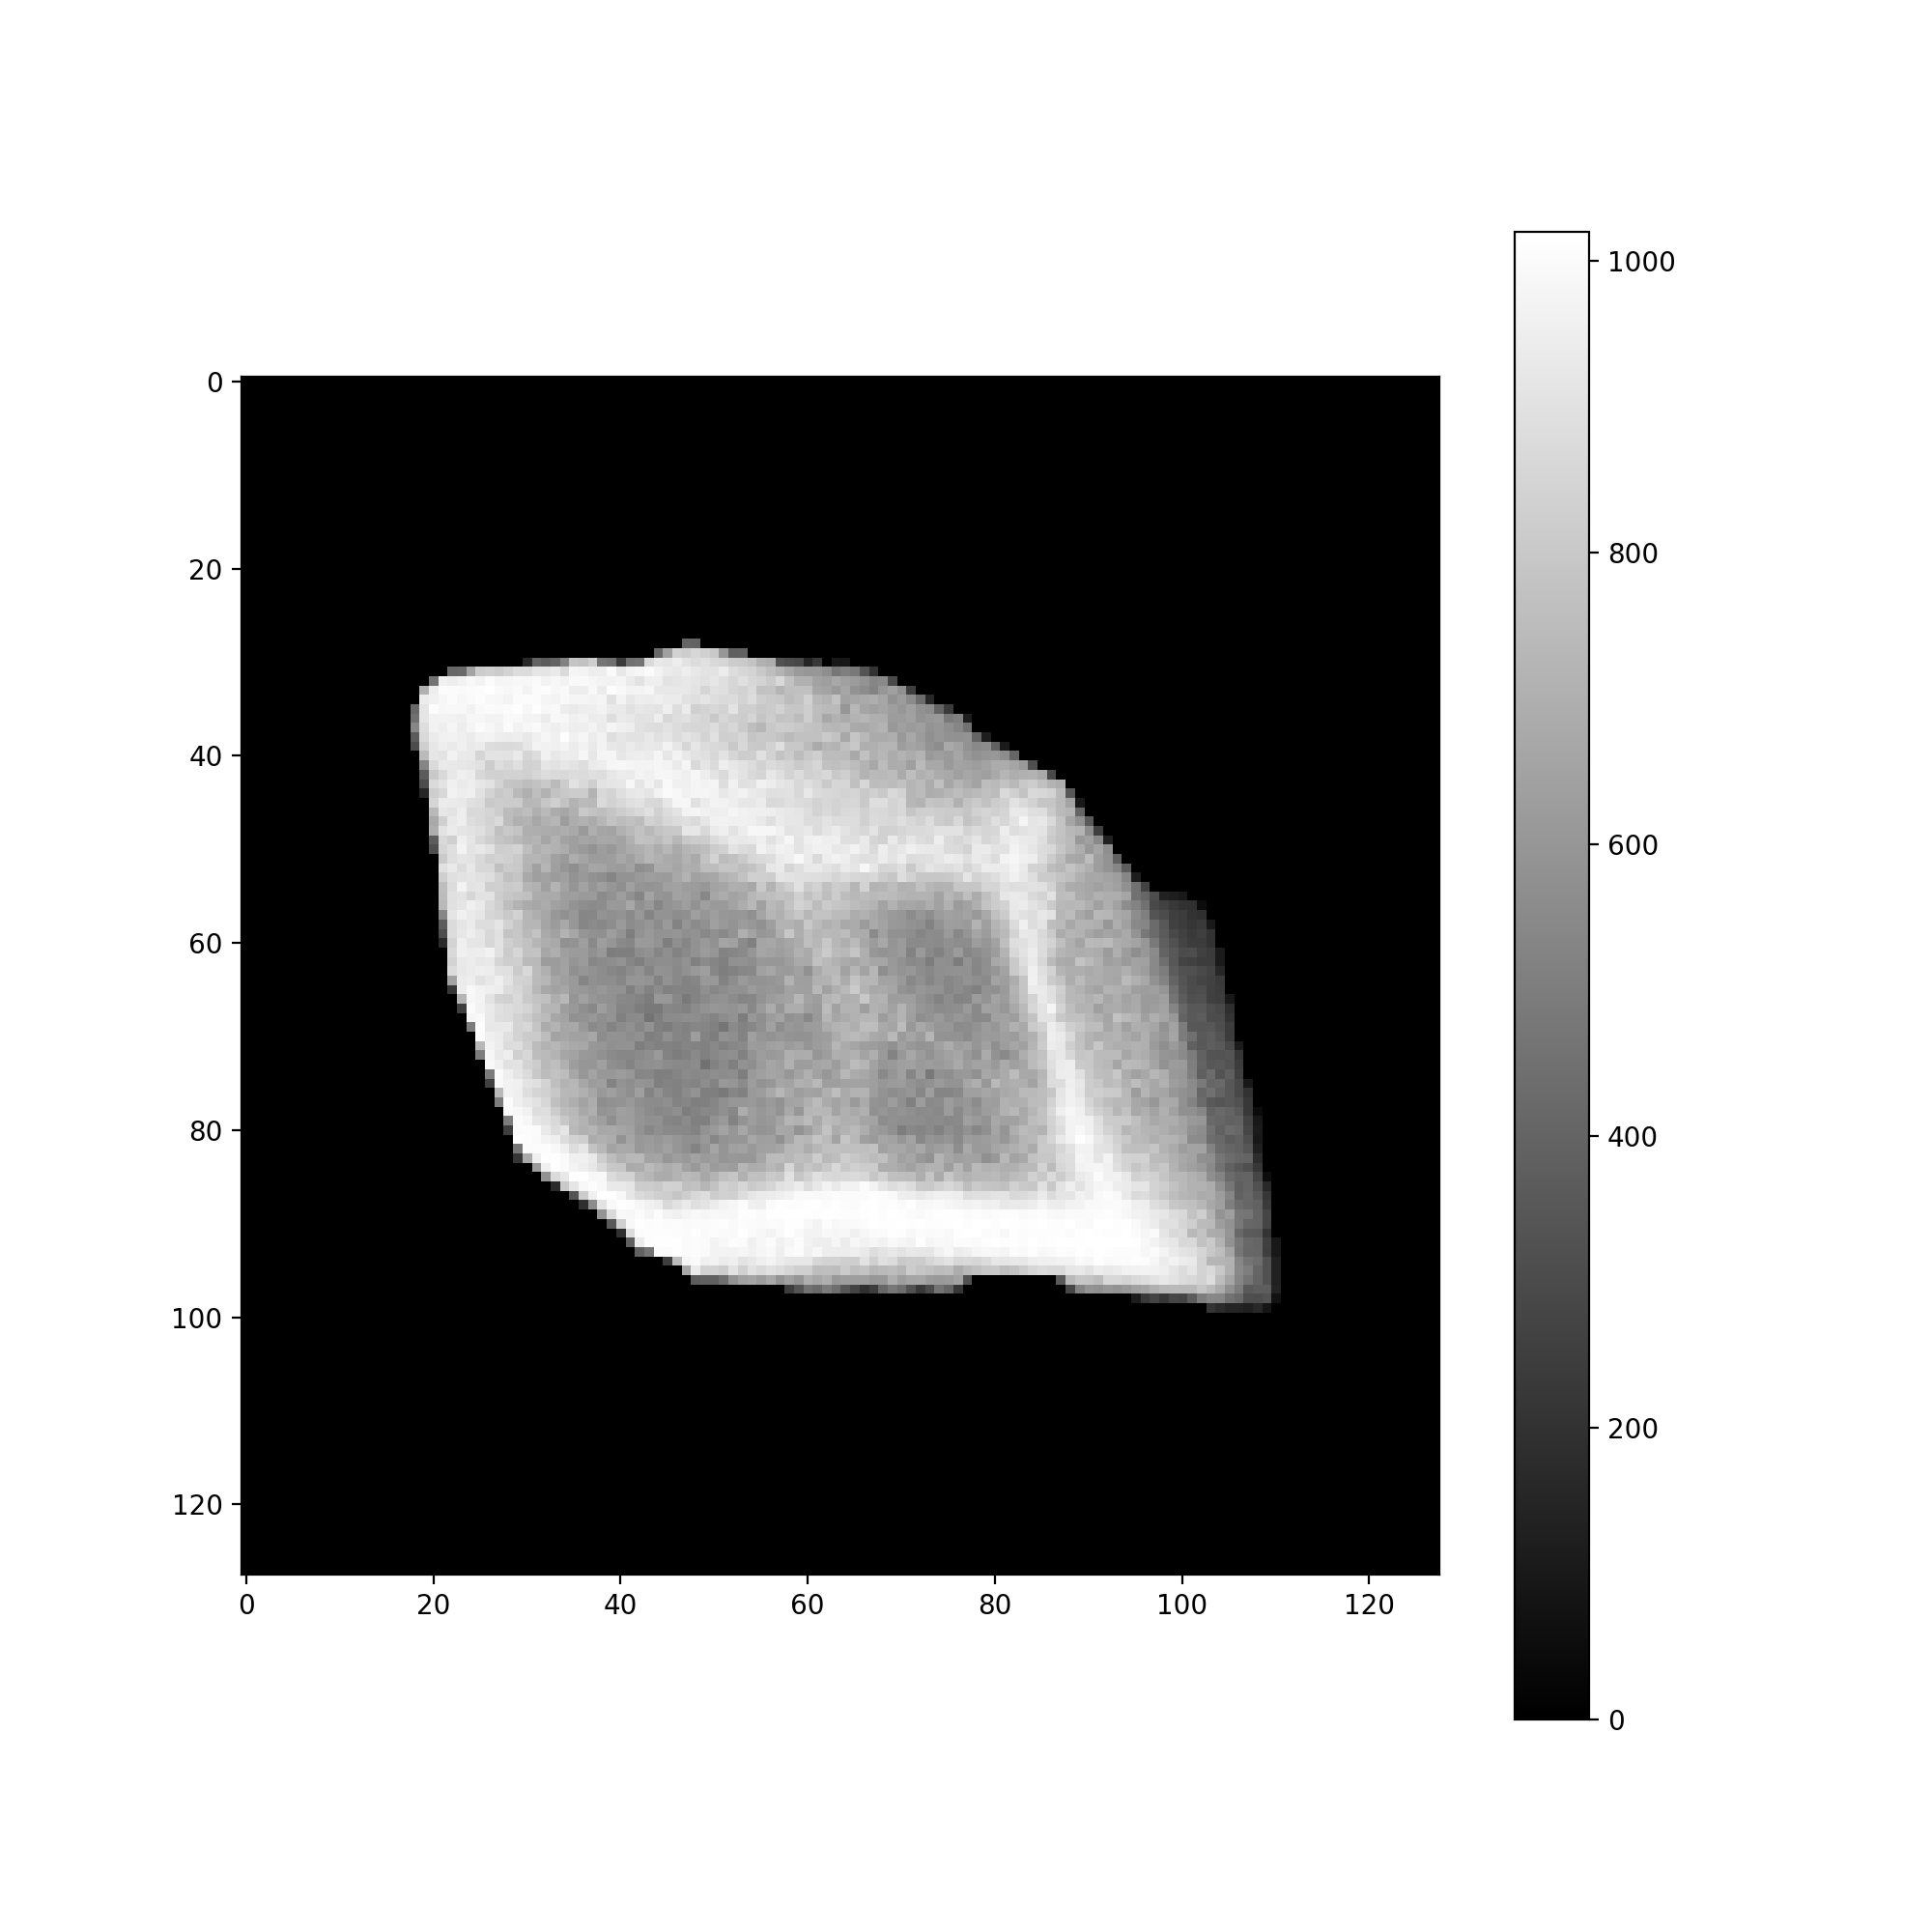

In [137]:
rdp.imm(particles_indiv[3],(128,128))

<IPython.core.display.Javascript object>


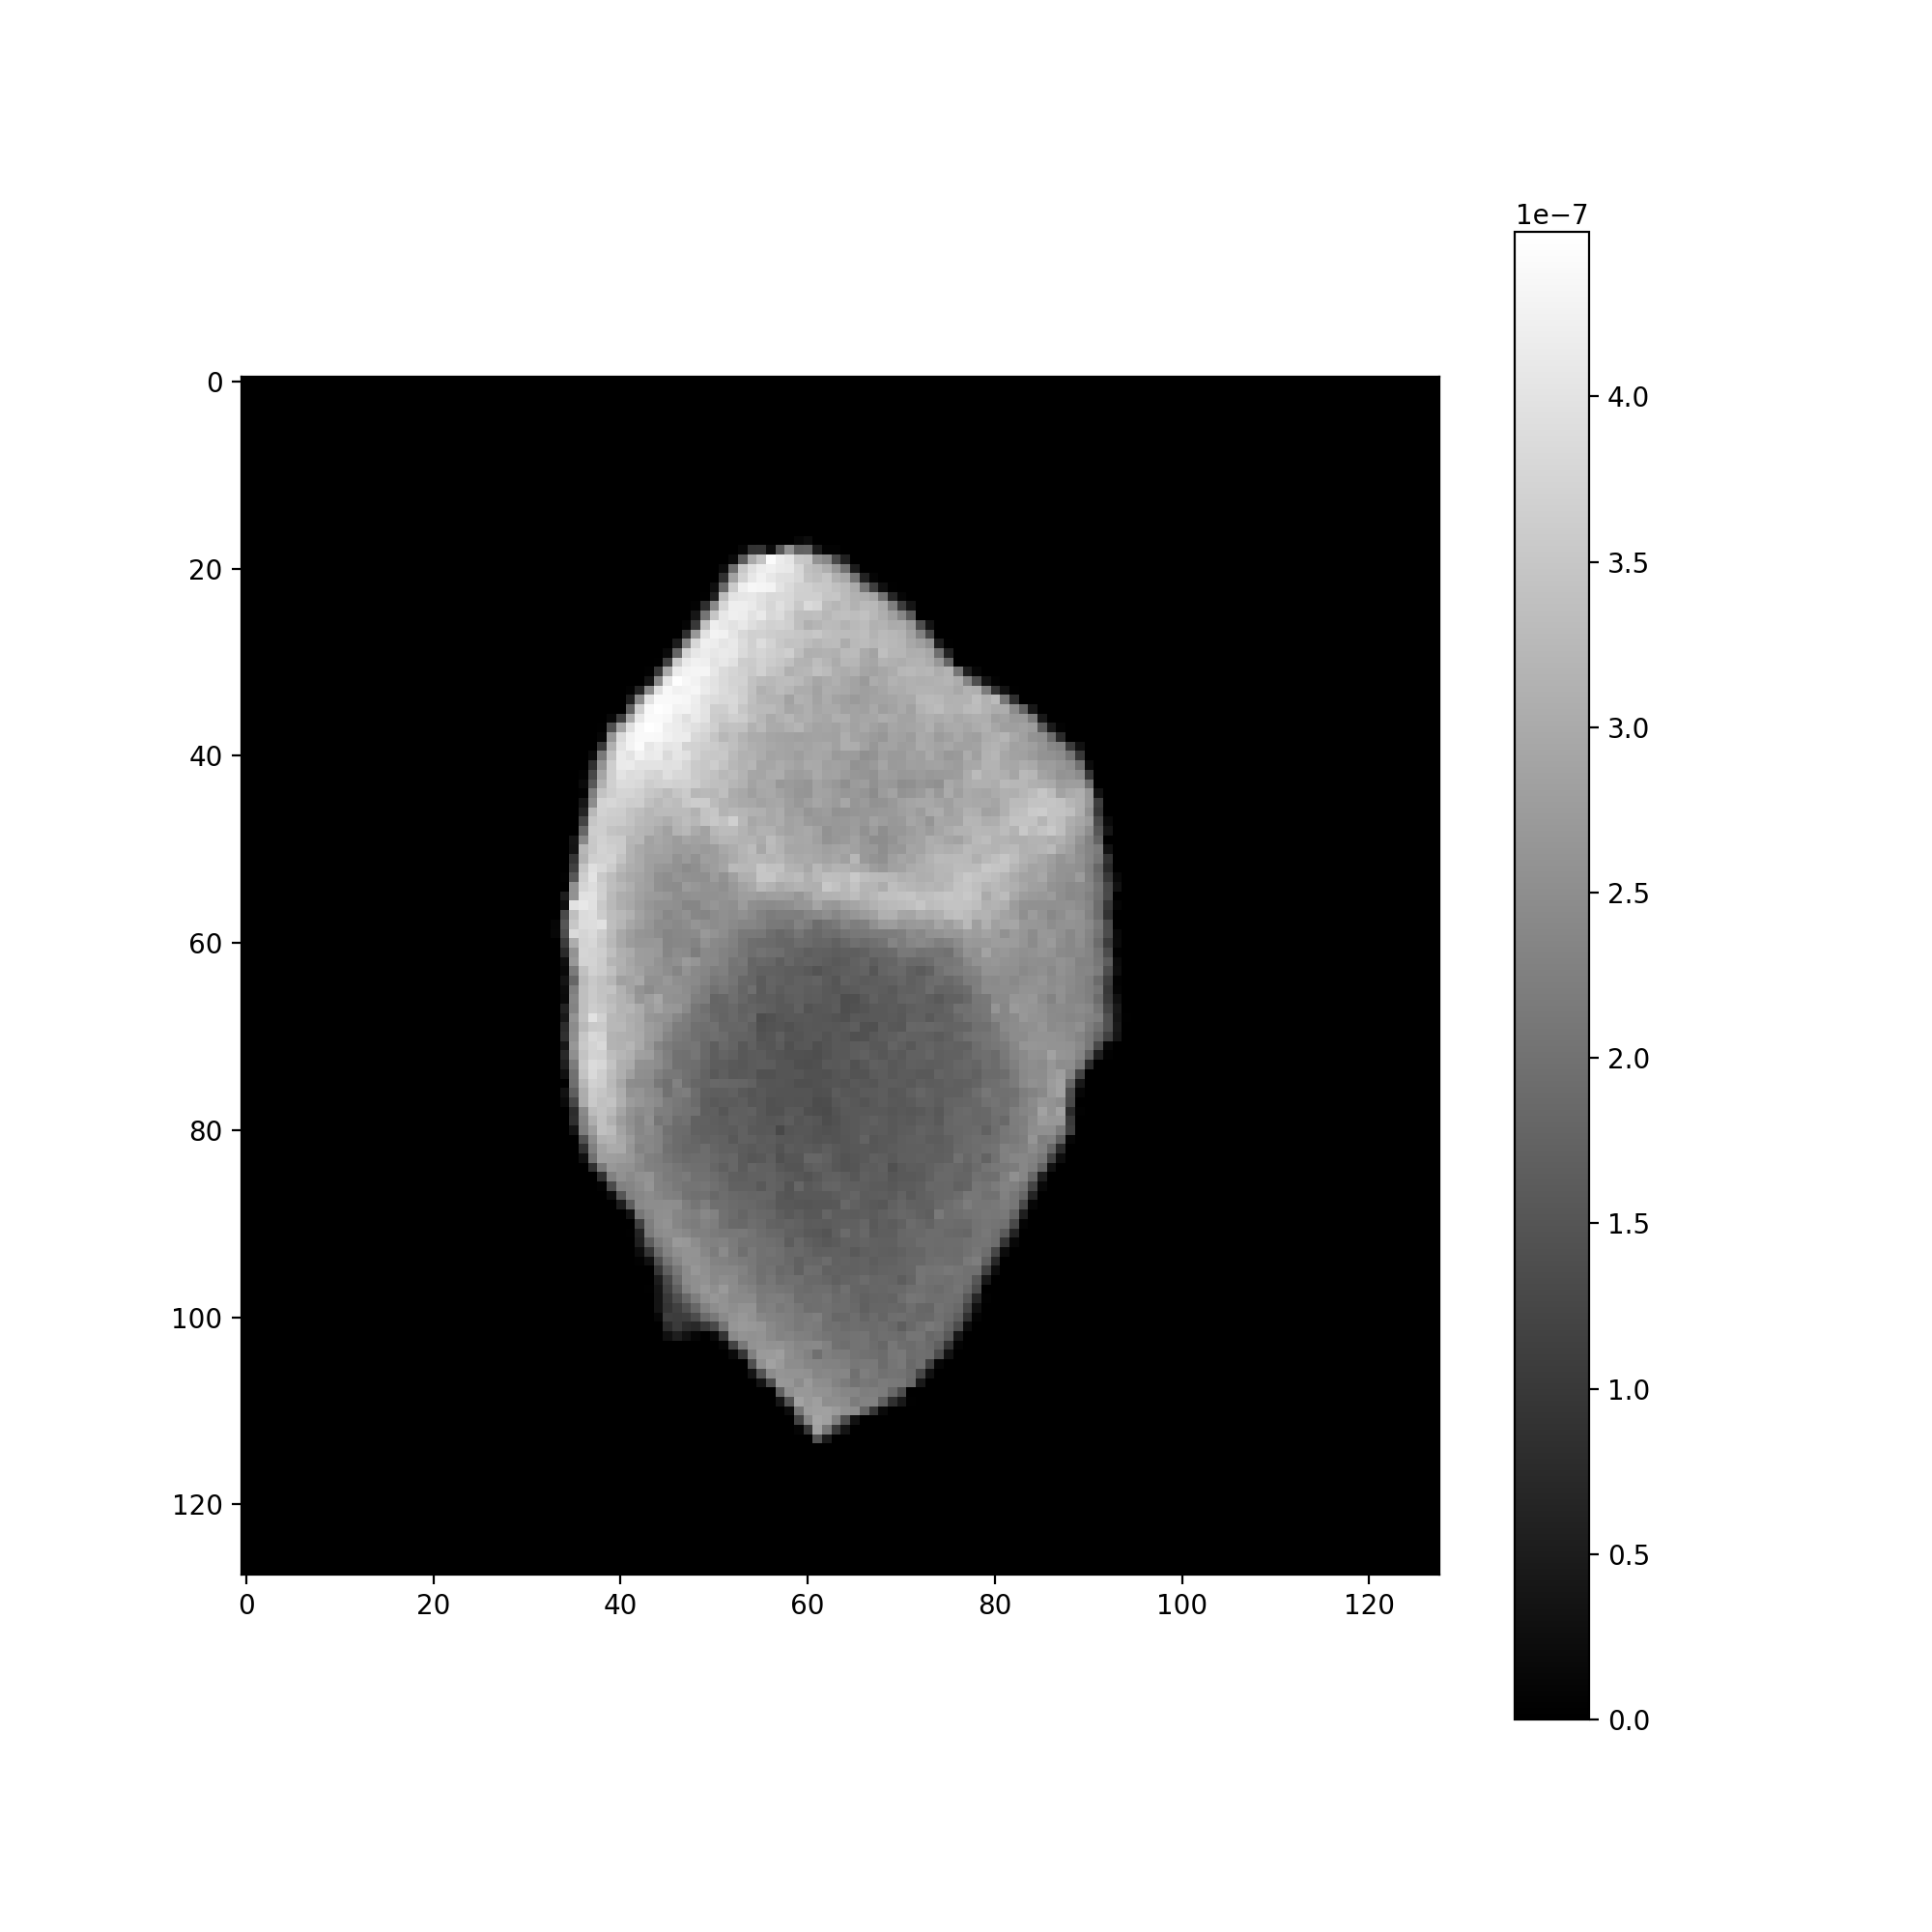

In [139]:
rdp.imm(rot_test,(128,128))

In [106]:
len(regions)

1

In [162]:
def rotate_stack(img_stack,mask_stack):
    rot_stack = np.zeros(img_stack.shape)
    for idx, mask in enumerate(mask_stack):
        label_img = label(mask)
        regions = regionprops(label_img)
        if len(regions) > 1:
            print('WARNING! Greater than 1 region detected in Image #',idx, 'number of regions: ', len(regions))
        orientation = regions[0].orientation*(180/np.pi)
        rot_stack[idx] = rotate(img_stack[idx],-1*orientation,preserve_range=True)
    return rot_stack

In [143]:
sys.path.append('/Users/cgroschner/Documents/HTTEM/structure_classification/')

In [144]:
import Fourier_image_manipulation as fim

In [157]:
a = fim.Fourier_rotate(particles_indiv[3],-orientation,outsize='original')

<IPython.core.display.Javascript object>


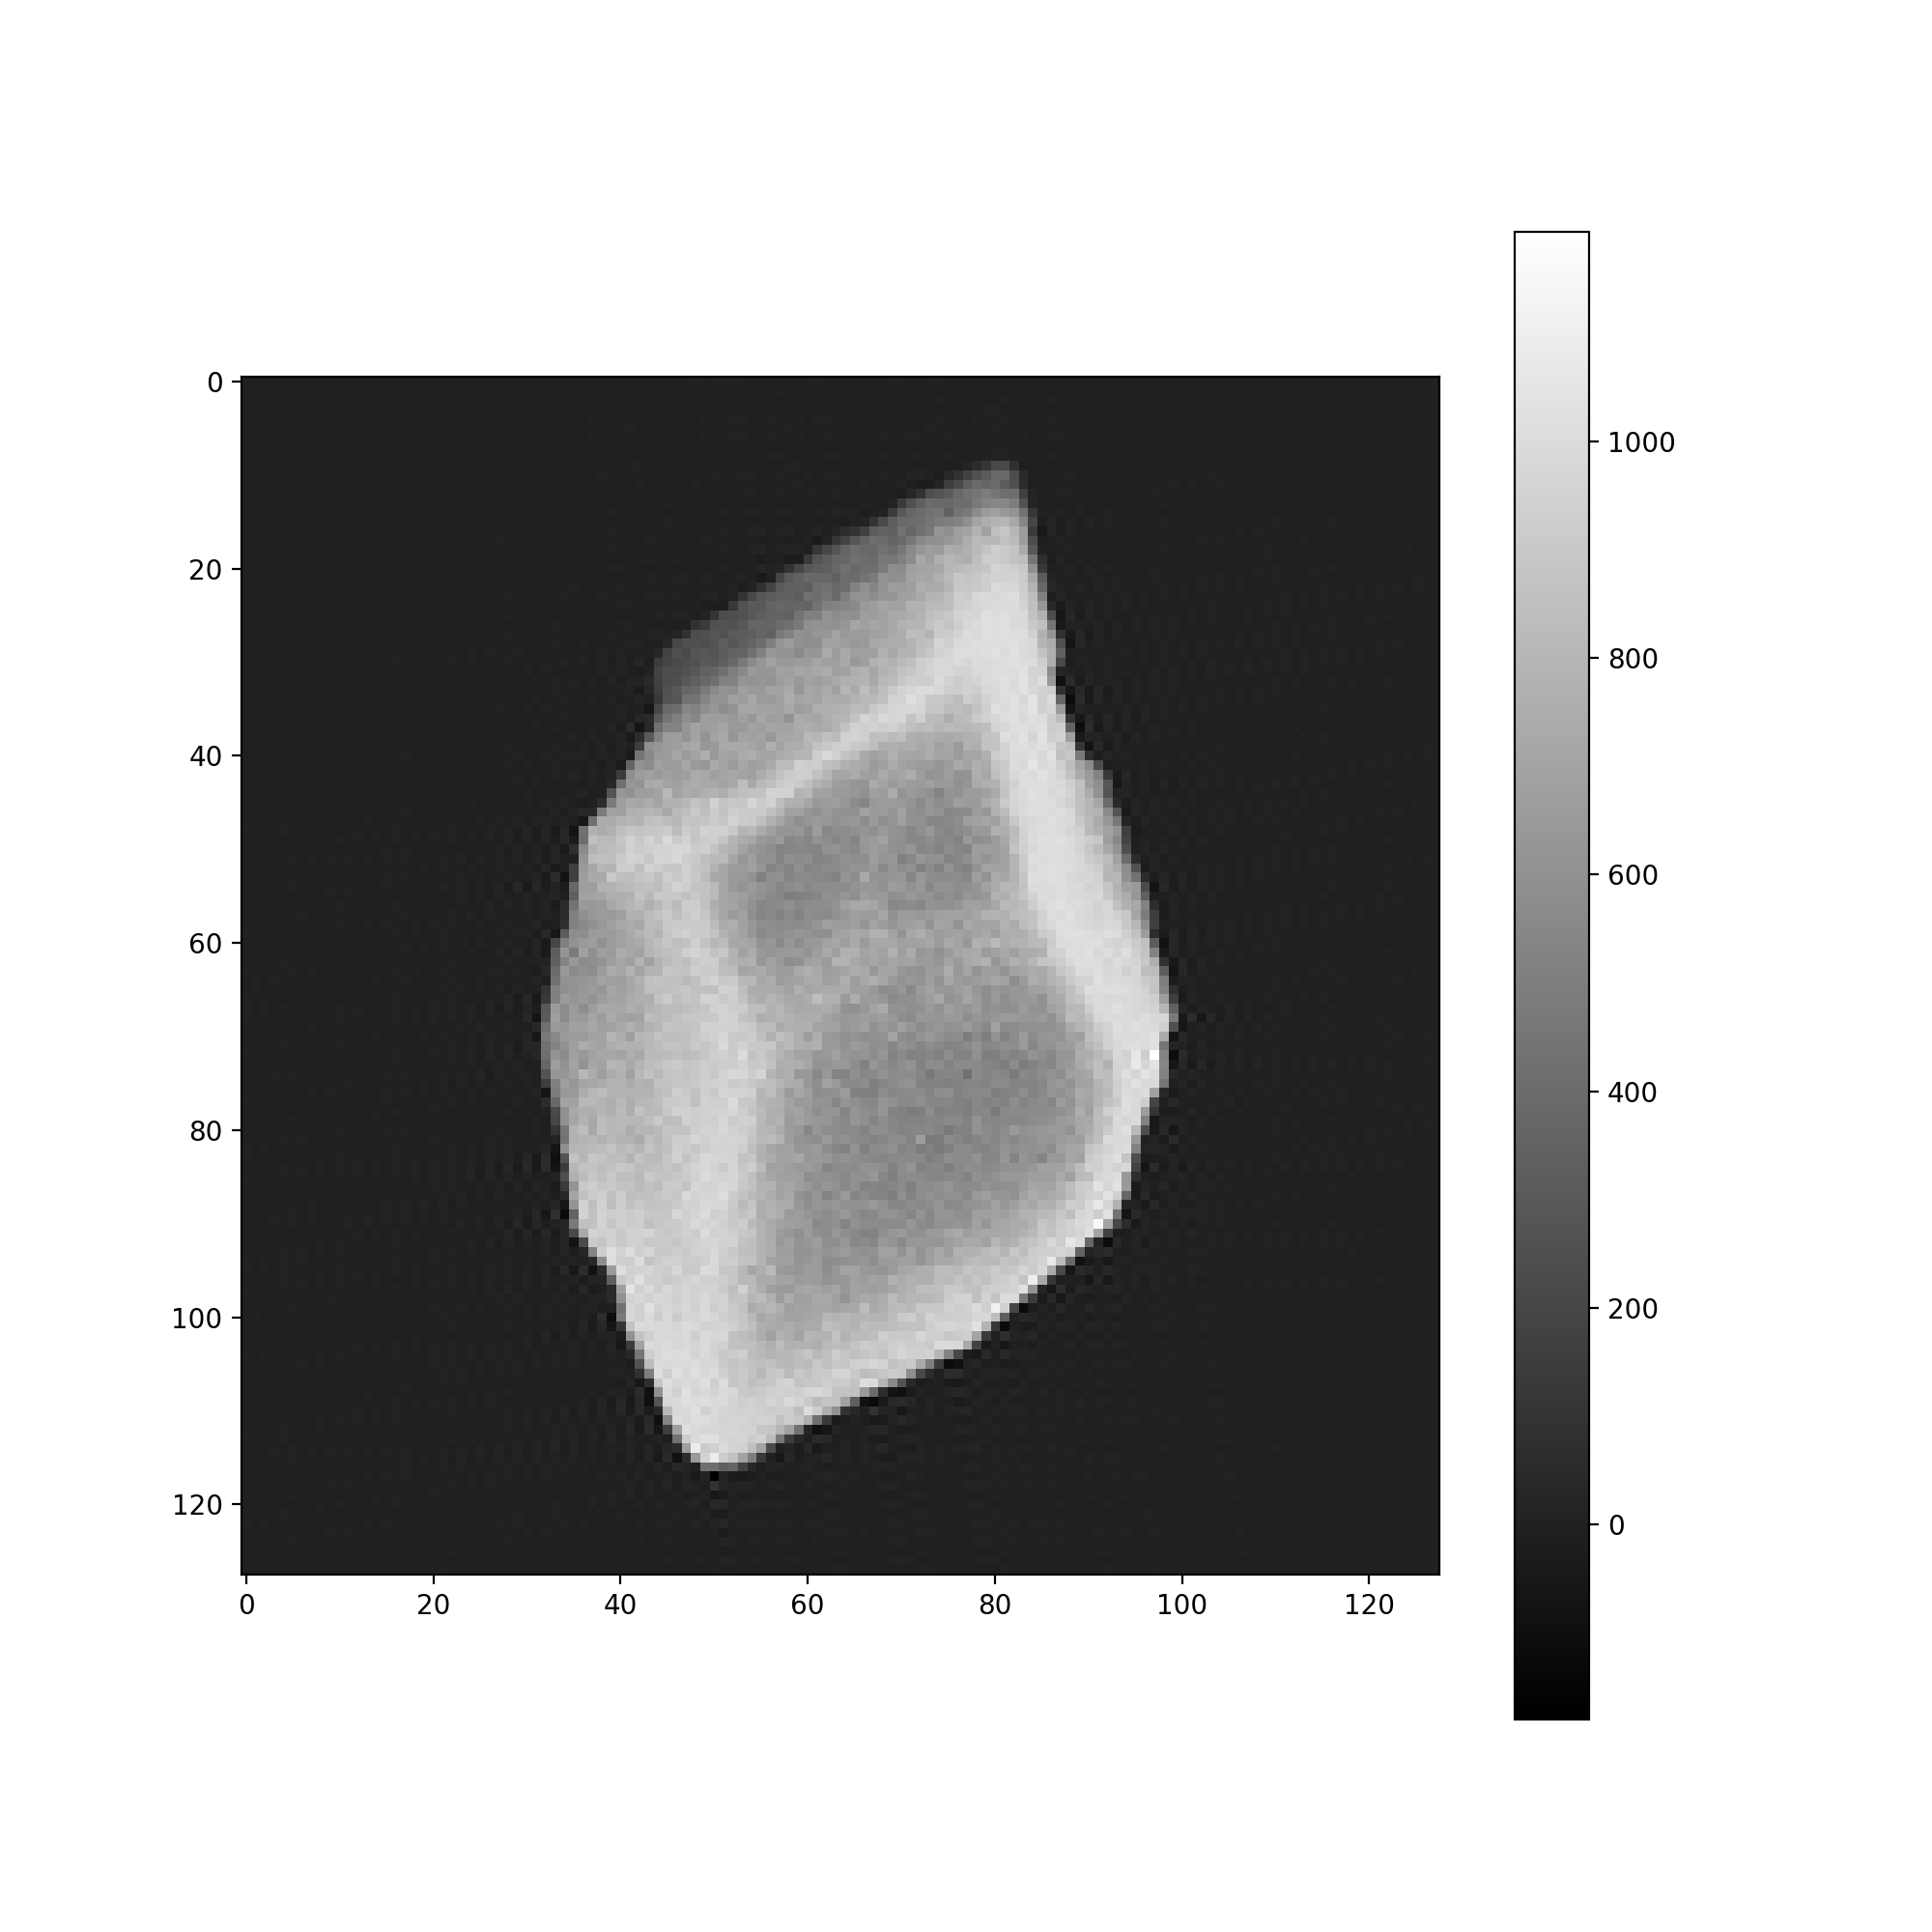

In [158]:
rdp.imm(a,a.shape)

In [163]:
rotated_indv_particles = rotate_stack(particles_indiv,masks_indv)

<IPython.core.display.Javascript object>


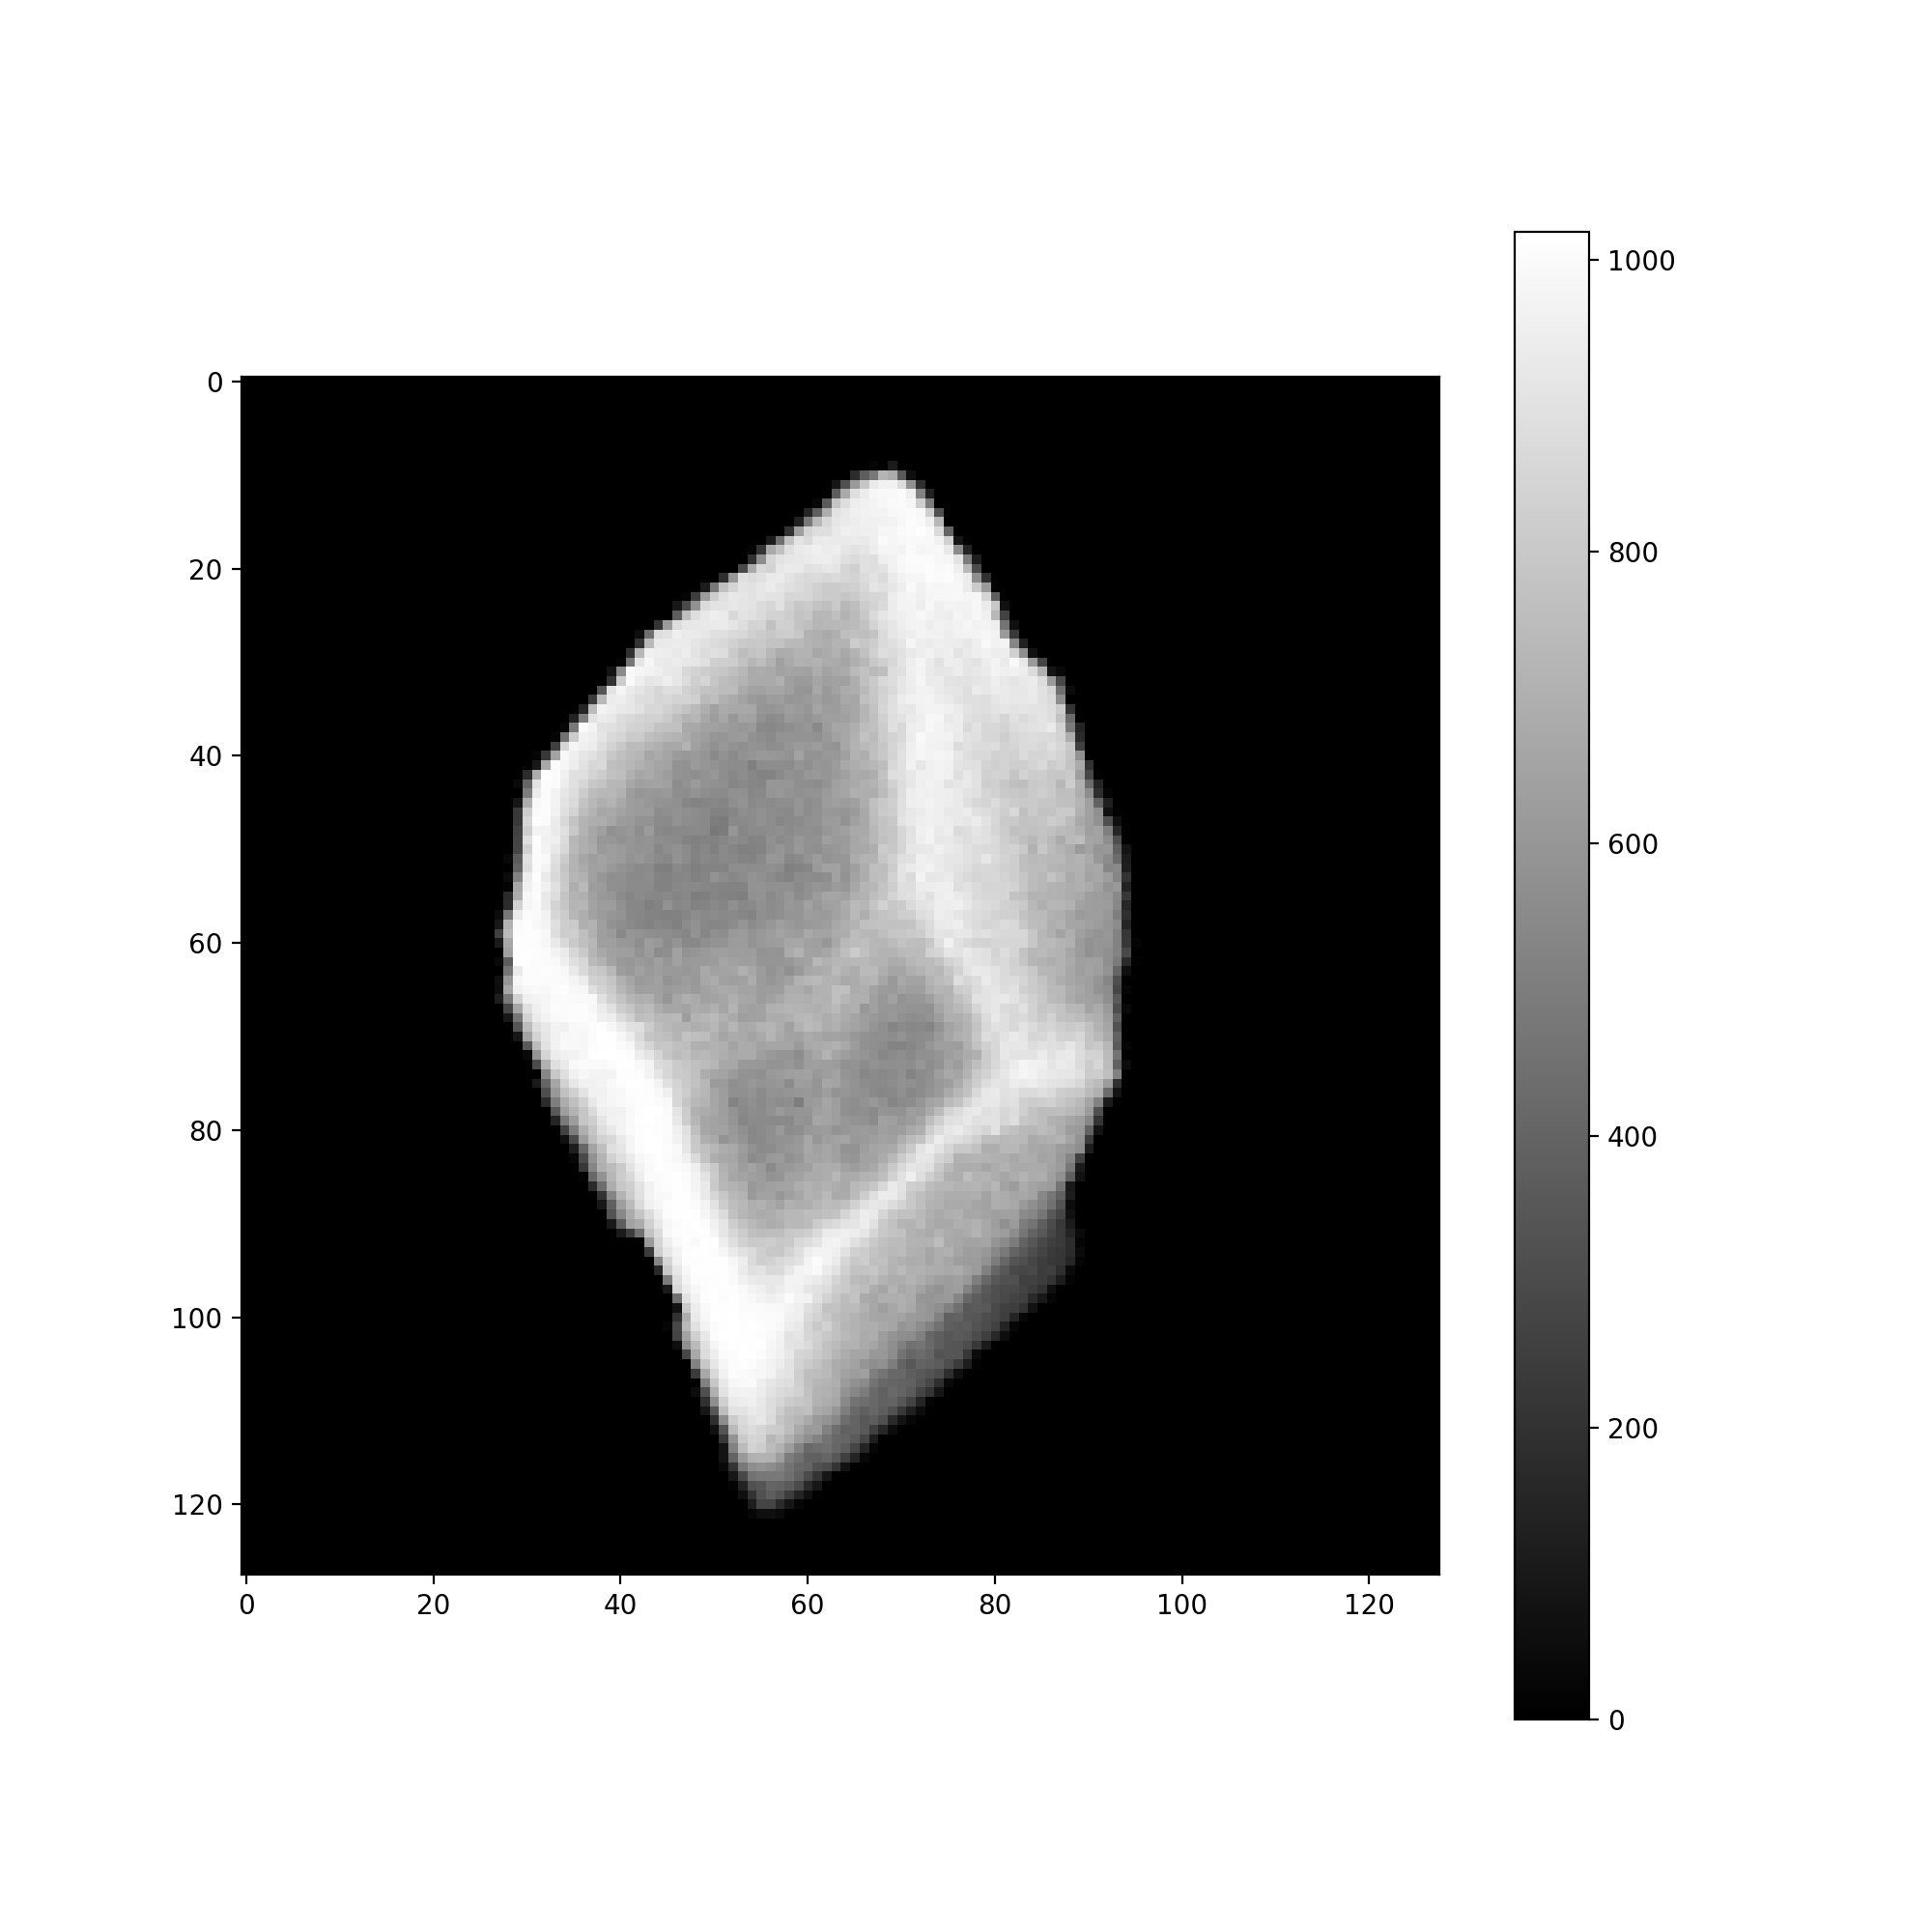

In [164]:
rdp.imm(rotated_indv_particles[3],(128,128))

<IPython.core.display.Javascript object>


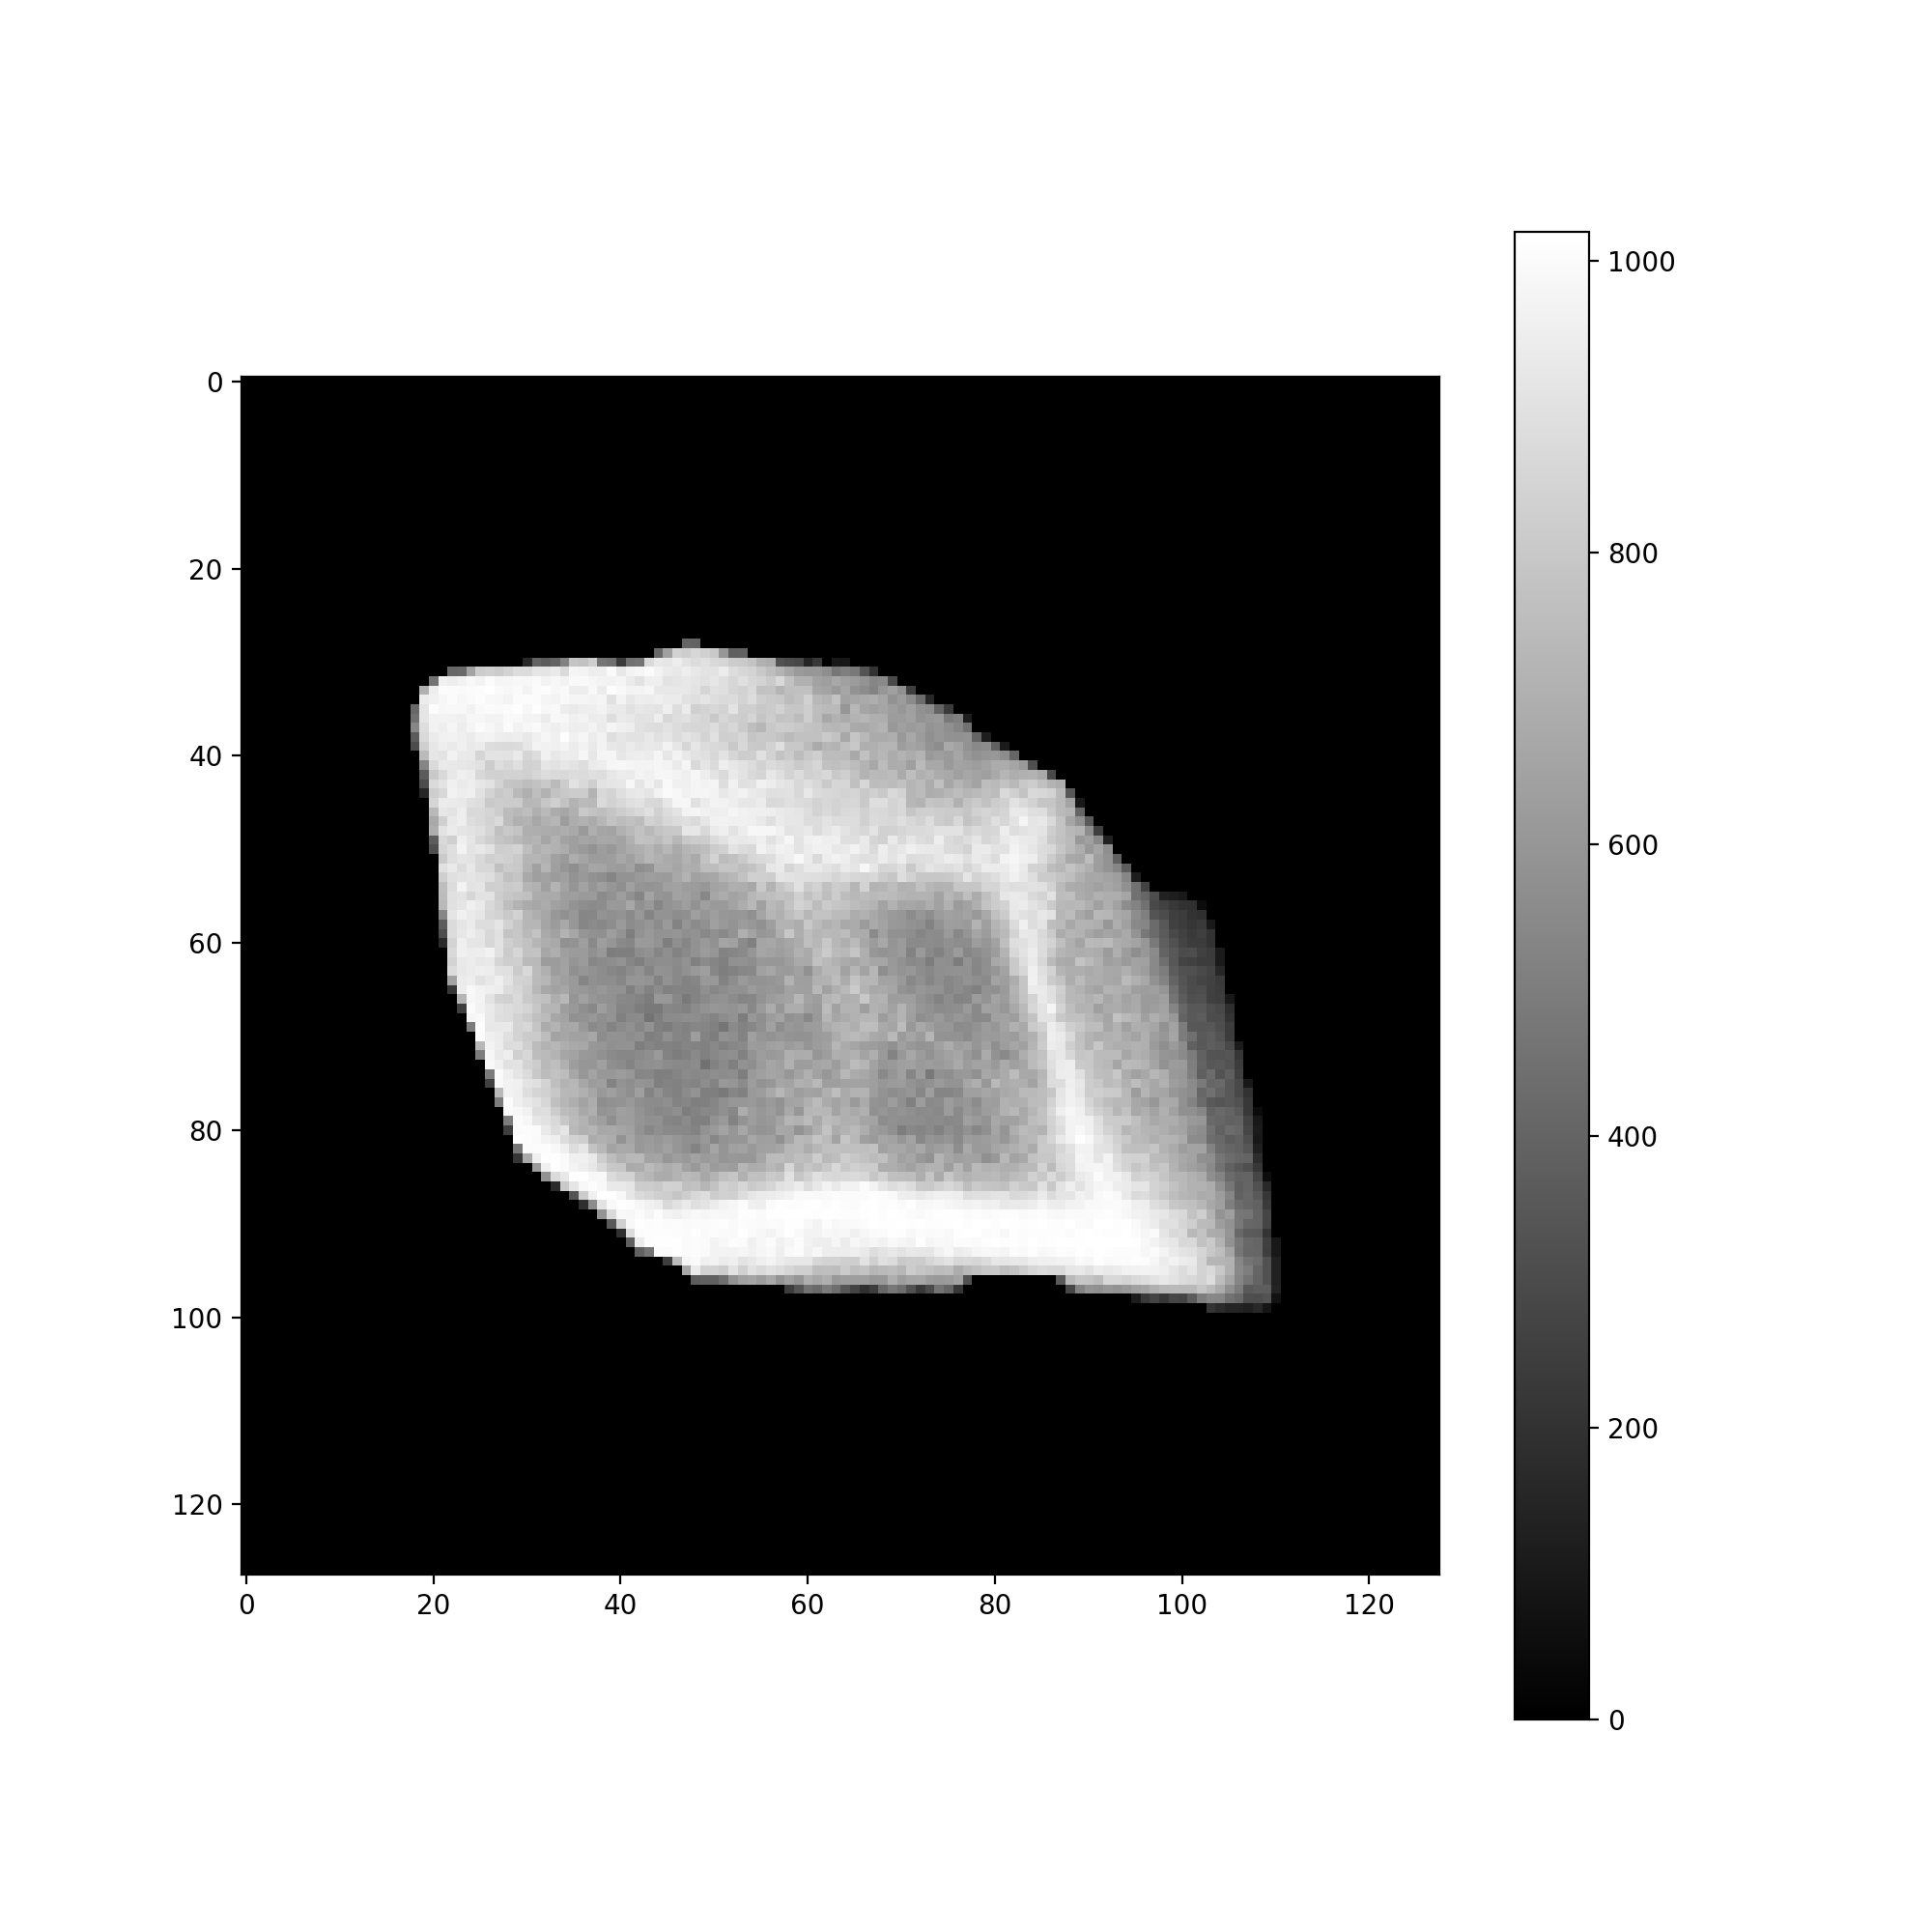

In [124]:
rdp.imm(particles_indiv[3],(128,128))

In [165]:
i = h5py.File('Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_oriented_20200428.h5','w')

In [166]:
i.create_dataset('cutouts',data=rotated_indv_particles)
i.close()

# Label based on rotated images